In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from random import shuffle
from tqdm import tqdm
# import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import batchify as batchify
import evaluate_plot as eval_plot
import rnn

import os
# 1 starts the process on GPU-0
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
print torch.__version__

0.4.0


In [2]:
data = pickle.load(open('../../Data/final_Physionet_avg_new.pkl','rb'))
# data['data_headers']

In [3]:
# # This is just for testing
# data['train_ids'] = data['train_ids'][:60]
# data['val_ids'] = data['val_ids'][:60]
# data['test_ids'] = data['test_ids'][:60]

In [4]:
params = {'hidden_dim' : 150,
        'dropout' : 0.9,
        'layers' : 1,
        'input_dim' : 50,
        'tagset_size' : 2,
        'bilstm_flag': True,
        'attn_category':'dot',
         'num_of_features': 37,
         'batch_size':3,
         'model_name':'BA-Avg-Phy-4th-'}
pickle.dump(params, open('../../Models/config_'+params['model_name']+'.pt','wb'))

In [5]:
model_RNN = rnn.RNN_osaka(params).cuda()
loss_function = nn.NLLLoss()
# optimizer = optim.Adam(model_RNN.parameters(), lr=0.01, weight_decay=0.00005)
optimizer = optim.SGD(model_RNN.parameters(), lr=0.0001, weight_decay=0.000000002)

/home/bsingh/anaconda2/lib/python2.7/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Dot Attention is being used!


In [6]:
save_flag = True
dict_df_prf_mod = {}
print "=x="*20
print "Data Statistics"
print "Train Data: "+str(len(data['train_ids']))
print "Val Data: "+str(len(data['val_ids']))
print "Test Data: "+str(len(data['test_ids']))
print "=x="*20

=x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x=
Data Statistics
Train Data: 2517
Val Data: 630
Test Data: 787
=x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x==x=


In [7]:
mode = 'normal'
if(mode=='normal'):
    feature_ind = 0
    label_ind = -1
    print "NORMAL mode with NO missing values"
elif(mode=='average'):
    feature_ind = 3
    label_ind = -1
    print "AVERAGE mode where missing data replaced with average values"

NORMAL mode with NO missing values


100%|██████████| 839/839 [00:13<00:00, 64.42it/s]


==========Epoch No:0==========
Training Loss: 579.130389571
Train: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518, None)
                    0            1
Precision    0.463918     0.657480
Recall       0.244300     0.837093
F-score      0.320057     0.736494
Count      921.000000  1596.000000
--------
Val: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399, None)
                    0           1
Precision    0.467213    0.633858
Recall       0.234568    0.832041
F-score      0.312329    0.719553
Count      243.000000  387.000000
--------
Test: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433, None)
                    0           1
Precision    0.429577    0.634109
Recall       0.205387    0.834694
F-score      0.277904    0.720705
Count      297.000000  490.000000




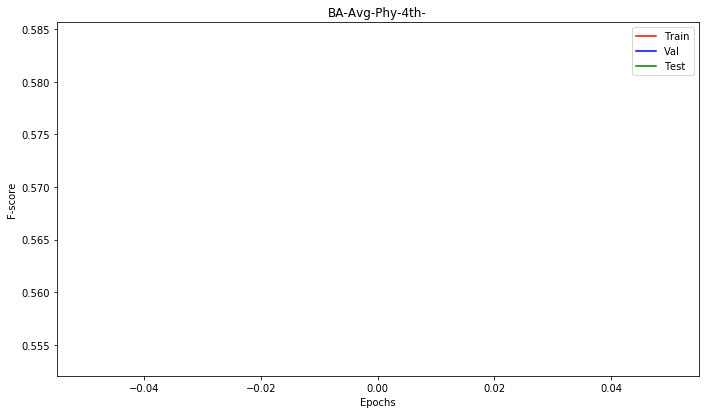

  1%|          | 8/839 [00:00<00:10, 75.90it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 63.94it/s]


==========Epoch No:1==========
Training Loss: 545.724495798
Train: (0.5858020059676062, 0.6305125148986889, 0.5544192270231413, None)
                    0            1
Precision    0.481172     0.646181
Recall       0.124864     0.922306
F-score      0.198276     0.759938
Count      921.000000  1596.000000
--------
Val: (0.5685763888888888, 0.6111111111111112, 0.5255357311432078, None)
                    0           1
Precision    0.481481    0.623264
Recall       0.106996    0.927649
F-score      0.175084    0.745587
Count      243.000000  387.000000
--------
Test: (0.558759028271982, 0.6124523506988564, 0.5290406607513183, None)
                    0           1
Precision    0.442857    0.629010
Recall       0.104377    0.920408
F-score      0.168937    0.747307
Count      297.000000  490.000000




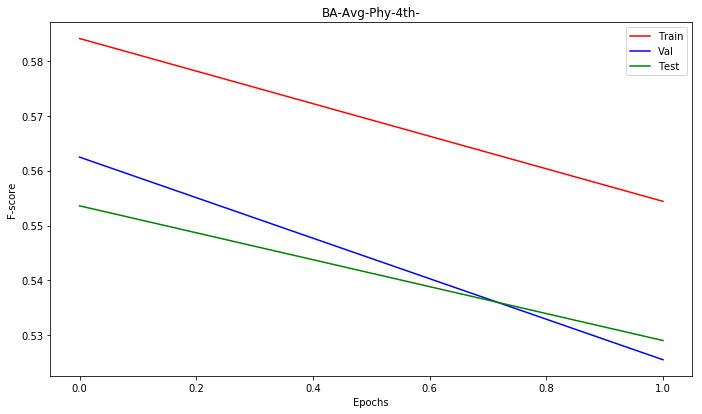

  1%|          | 7/839 [00:00<00:12, 64.32it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 64.12it/s]


==========Epoch No:2==========
Training Loss: 536.407231271
Train: (0.5983668189842553, 0.6360746920937624, 0.5602817334945873, None)
                    0            1
Precision    0.510638     0.648992
Recall       0.130293     0.927945
F-score      0.207612     0.763796
Count      921.000000  1596.000000
--------
Val: (0.5849950396825396, 0.6174603174603175, 0.5332820865531146, None)
                    0           1
Precision    0.518519    0.626736
Recall       0.115226    0.932817
F-score      0.188552    0.749740
Count      243.000000  387.000000
--------
Test: (0.5779193804924428, 0.6200762388818297, 0.5397158845920842, None)
                    0           1
Precision    0.486111    0.633566
Recall       0.117845    0.924490
F-score      0.189702    0.751867
Count      297.000000  490.000000




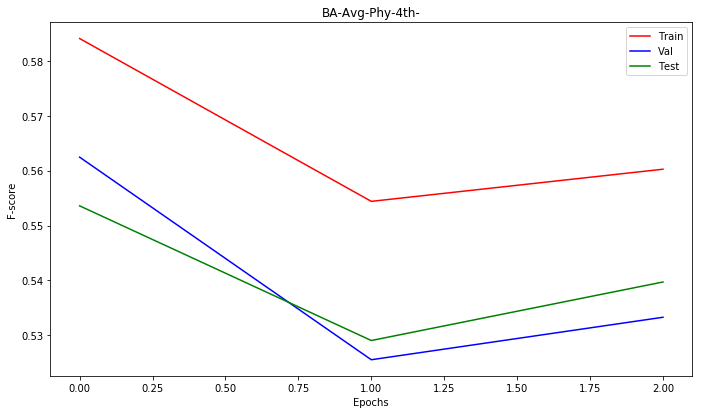

  1%|          | 8/839 [00:00<00:11, 74.68it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.96it/s]


==========Epoch No:3==========
Training Loss: 529.66690892
Train: (0.628263512113383, 0.6483909415971395, 0.5716135397181774, None)
                    0            1
Precision    0.582569     0.654632
Recall       0.137894     0.942982
F-score      0.223003     0.772786
Count      921.000000  1596.000000
--------
Val: (0.5926065162907268, 0.6206349206349207, 0.542345761669763, None)
                    0           1
Precision    0.533333    0.629825
Recall       0.131687    0.927649
F-score      0.211221    0.750261
Count      243.000000  387.000000
--------
Test: (0.6013602183014977, 0.6289707750952986, 0.5381680520404195, None)
                    0           1
Precision    0.545455    0.635246
Recall       0.101010    0.948980
F-score      0.170455    0.761047
Count      297.000000  490.000000




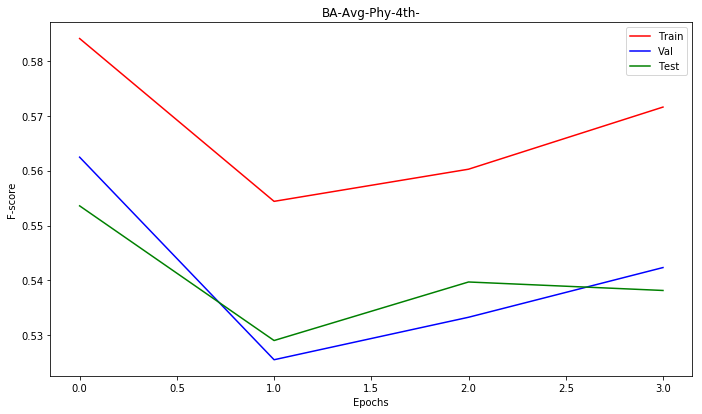

  1%|          | 6/839 [00:00<00:14, 57.01it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 64.38it/s]


==========Epoch No:4==========
Training Loss: 524.248710394
Train: (0.6324092501727162, 0.6507747318235996, 0.5778394374187067, None)
                    0            1
Precision    0.589744     0.657030
Recall       0.149837     0.939850
F-score      0.238961     0.773395
Count      921.000000  1596.000000
--------
Val: (0.5967851566087995, 0.6222222222222222, 0.5417083333333333, None)
                    0           1
Precision    0.543860    0.630017
Recall       0.127572    0.932817
F-score      0.206667    0.752083
Count      243.000000  387.000000
--------
Test: (0.6112290679525787, 0.6327827191867853, 0.5466474297008271, None)
                    0           1
Precision    0.566667    0.638239
Recall       0.114478    0.946939
F-score      0.190476    0.762531
Count      297.000000  490.000000




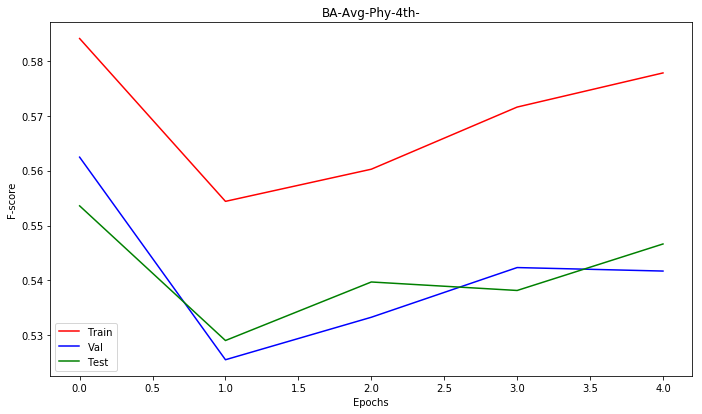

  1%|          | 6/839 [00:00<00:17, 47.91it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.61it/s]


==========Epoch No:5==========
Training Loss: 519.434267521
Train: (0.6556799088197715, 0.6615017878426699, 0.592569939420333, None)
                    0            1
Precision    0.641975     0.663588
Recall       0.169381     0.945489
F-score      0.268041     0.779845
Count      921.000000  1596.000000
--------
Val: (0.6203020640606752, 0.6317460317460317, 0.5532619047619047, None)
                    0           1
Precision    0.596491    0.635253
Recall       0.139918    0.940568
F-score      0.226667    0.758333
Count      243.000000  387.000000
--------
Test: (0.6198921803838262, 0.636594663278272, 0.554925703245172, None)
                    0           1
Precision    0.584615    0.641274
Recall       0.127946    0.944898
F-score      0.209945    0.764026
Count      297.000000  490.000000




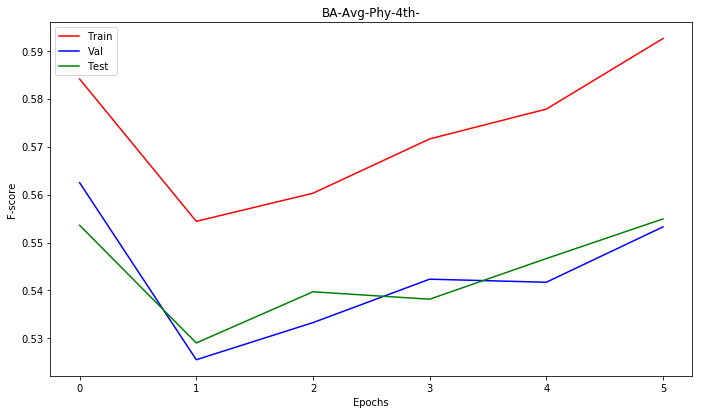

  1%|          | 7/839 [00:00<00:12, 66.81it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.02it/s]


==========Epoch No:6==========
Training Loss: 514.714103892
Train: (0.6604077259693689, 0.6670639650377433, 0.6076278773134827, None)
                    0            1
Precision    0.643599     0.670108
Recall       0.201954     0.935464
F-score      0.307438     0.780858
Count      921.000000  1596.000000
--------
Val: (0.6130860274477296, 0.6301587301587301, 0.5586507231602328, None)
                    0           1
Precision    0.575758    0.636525
Recall       0.156379    0.927649
F-score      0.245955    0.754995
Count      243.000000  387.000000
--------
Test: (0.6129720897756866, 0.6353240152477764, 0.5634262727407454, None)
                    0           1
Precision    0.562500    0.643564
Recall       0.151515    0.928571
F-score      0.238727    0.760234
Count      297.000000  490.000000




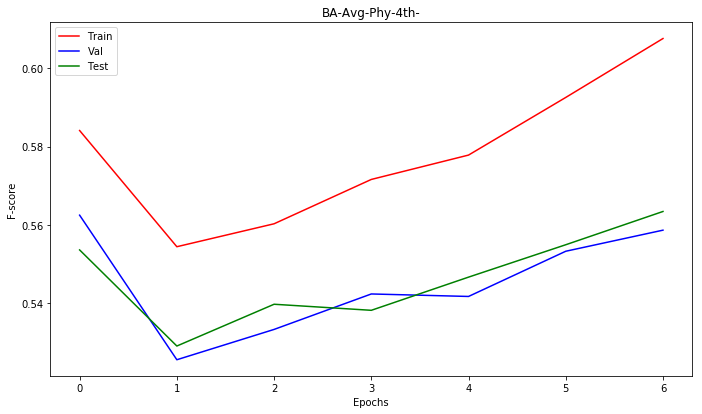

  1%|          | 8/839 [00:00<00:10, 77.01it/s]

==========Epoch0========
TRAIN: (0.5866534064021768, 0.6201827572506953, 0.5841147103390518)
VAL: (0.5695808515738812, 0.6015873015873016, 0.5624808405033399)
TEST: (0.5569220906439989, 0.5972045743329097, 0.5535996948802433)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.463918     0.657480    0.467213    0.633858    0.429577   
Recall       0.244300     0.837093    0.234568    0.832041    0.205387   
F-score      0.320057     0.736494    0.312329    0.719553    0.277904   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.634109  
Recall       0.834694  
F-score      0.720705  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.20it/s]


==========Epoch No:7==========
Training Loss: 512.325812116
Train: (0.6606568257519974, 0.6706396503774334, 0.6210401915932257, None)
                    0            1
Precision    0.632948     0.676647
Recall       0.237785     0.920426
F-score      0.345699     0.779931
Count      921.000000  1596.000000
--------
Val: (0.6331322007172104, 0.6428571428571429, 0.5851442674972087, None)
                    0           1
Precision    0.609756    0.647810
Recall       0.205761    0.917313
F-score      0.307692    0.759358
Count      243.000000  387.000000
--------
Test: (0.6038771967192772, 0.6315120711562897, 0.5680567294610489, None)
                    0           1
Precision    0.536842    0.644509
Recall       0.171717    0.910204
F-score      0.260204    0.754653
Count      297.000000  490.000000




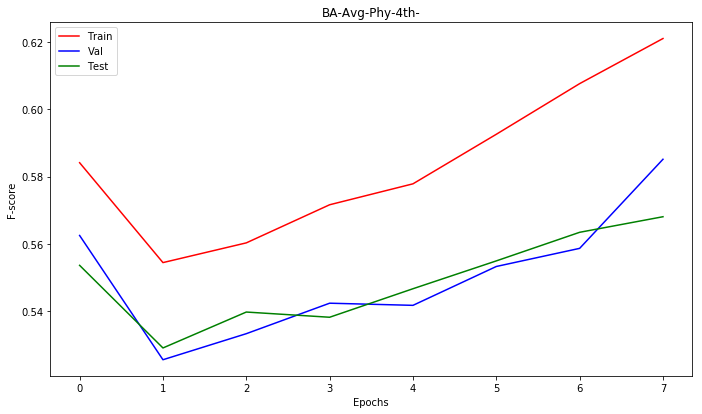

  1%|          | 6/839 [00:00<00:14, 57.83it/s]

==========Epoch7========
TRAIN: (0.6606568257519974, 0.6706396503774334, 0.6210401915932257)
VAL: (0.6331322007172104, 0.6428571428571429, 0.5851442674972087)
TEST: (0.6038771967192772, 0.6315120711562897, 0.5680567294610489)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.632948     0.676647    0.609756    0.647810    0.536842   
Recall       0.237785     0.920426    0.205761    0.917313    0.171717   
F-score      0.345699     0.779931    0.307692    0.759358    0.260204   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.644509  
Recall       0.910204  
F-score      0.754653  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 61.09it/s]


==========Epoch No:8==========
Training Loss: 509.397232726
Train: (0.668848410999205, 0.6769964243146603, 0.6321244829780135, None)
                    0            1
Precision    0.645161     0.682517
Recall       0.260586     0.917293
F-score      0.371230     0.782678
Count      921.000000  1596.000000
--------
Val: (0.6415608465608464, 0.6492063492063492, 0.5975676092180946, None)
                    0           1
Precision    0.622222    0.653704
Recall       0.230453    0.912145
F-score      0.336336    0.761597
Count      243.000000  387.000000
--------
Test: (0.6129979653615849, 0.636594663278272, 0.5784946933668709, None)
                    0           1
Precision    0.553398    0.649123
Recall       0.191919    0.906122
F-score      0.285000    0.756388
Count      297.000000  490.000000




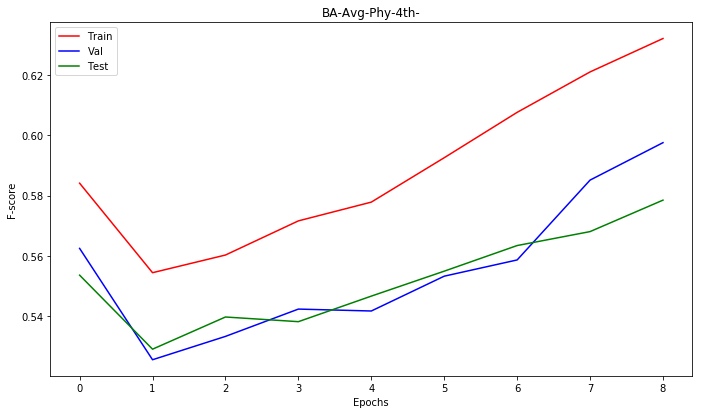

  1%|          | 7/839 [00:00<00:12, 64.25it/s]

==========Epoch8========
TRAIN: (0.668848410999205, 0.6769964243146603, 0.6321244829780135)
VAL: (0.6415608465608464, 0.6492063492063492, 0.5975676092180946)
TEST: (0.6129979653615849, 0.636594663278272, 0.5784946933668709)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.645161     0.682517    0.622222    0.653704    0.553398   
Recall       0.260586     0.917293    0.230453    0.912145    0.191919   
F-score      0.371230     0.782678    0.336336    0.761597    0.285000   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.649123  
Recall       0.906122  
F-score      0.756388  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.92it/s]


==========Epoch No:9==========
Training Loss: 505.673406854
Train: (0.6744422716444218, 0.6813667063965038, 0.6391574096803586, None)
                    0            1
Precision    0.653747     0.686385
Recall       0.274701     0.916040
F-score      0.386850     0.784756
Count      921.000000  1596.000000
--------
Val: (0.671997341585495, 0.6666666666666666, 0.6170154756958871, None)
                    0           1
Precision    0.685393    0.663586
Recall       0.251029    0.927649
F-score      0.367470    0.773707
Count      243.000000  387.000000
--------
Test: (0.6212861282746924, 0.6416772554002541, 0.5885805203797919, None)
                    0           1
Precision    0.567568    0.653846
Recall       0.212121    0.902041
F-score      0.308824    0.758148
Count      297.000000  490.000000




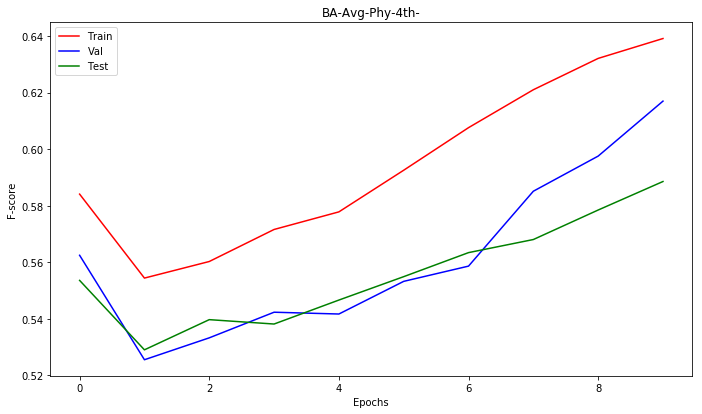

  1%|          | 8/839 [00:00<00:10, 78.35it/s]

==========Epoch9========
TRAIN: (0.6744422716444218, 0.6813667063965038, 0.6391574096803586)
VAL: (0.671997341585495, 0.6666666666666666, 0.6170154756958871)
TEST: (0.6212861282746924, 0.6416772554002541, 0.5885805203797919)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.653747     0.686385    0.685393    0.663586    0.567568   
Recall       0.274701     0.916040    0.251029    0.927649    0.212121   
F-score      0.386850     0.784756    0.367470    0.773707    0.308824   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.653846  
Recall       0.902041  
F-score      0.758148  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.02it/s]


==========Epoch No:10==========
Training Loss: 502.302818239
Train: (0.6758690787184267, 0.680969408025427, 0.6358079261102514, None)
                    0            1
Precision    0.661202     0.684333
Recall       0.262758     0.922306
F-score      0.376068     0.785695
Count      921.000000  1596.000000
--------
Val: (0.6654202939917224, 0.6634920634920635, 0.6145397572642436, None)
                    0           1
Precision    0.670330    0.662338
Recall       0.251029    0.922481
F-score      0.365269    0.771058
Count      243.000000  387.000000
--------
Test: (0.6105994147337366, 0.6353240152477764, 0.5786466288954889, None)
                    0           1
Precision    0.547170    0.649046
Recall       0.195286    0.902041
F-score      0.287841    0.754910
Count      297.000000  490.000000




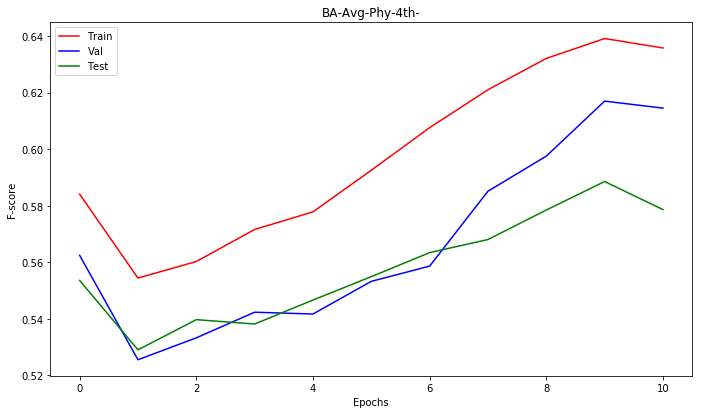

  1%|          | 7/839 [00:00<00:12, 64.44it/s]

==========Epoch9========
TRAIN: (0.6744422716444218, 0.6813667063965038, 0.6391574096803586)
VAL: (0.671997341585495, 0.6666666666666666, 0.6170154756958871)
TEST: (0.6212861282746924, 0.6416772554002541, 0.5885805203797919)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.653747     0.686385    0.685393    0.663586    0.567568   
Recall       0.274701     0.916040    0.251029    0.927649    0.212121   
F-score      0.386850     0.784756    0.367470    0.773707    0.308824   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.653846  
Recall       0.902041  
F-score      0.758148  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.02it/s]


==========Epoch No:11==========
Training Loss: 500.730221212
Train: (0.6734740530522477, 0.6817640047675805, 0.6421170366030745, None)
                    0            1
Precision    0.647783     0.688299
Recall       0.285559     0.910401
F-score      0.396383     0.783922
Count      921.000000  1596.000000
--------
Val: (0.6810209336543606, 0.6746031746031746, 0.6300206860294492, None)
                    0           1
Precision    0.697917    0.670412
Recall       0.275720    0.925065
F-score      0.395280    0.777416
Count      243.000000  387.000000
--------
Test: (0.6269689837426523, 0.6454891994917408, 0.5964104024726156, None)
                    0           1
Precision    0.576271    0.657698
Recall       0.228956    0.897959
F-score      0.327711    0.759275
Count      297.000000  490.000000




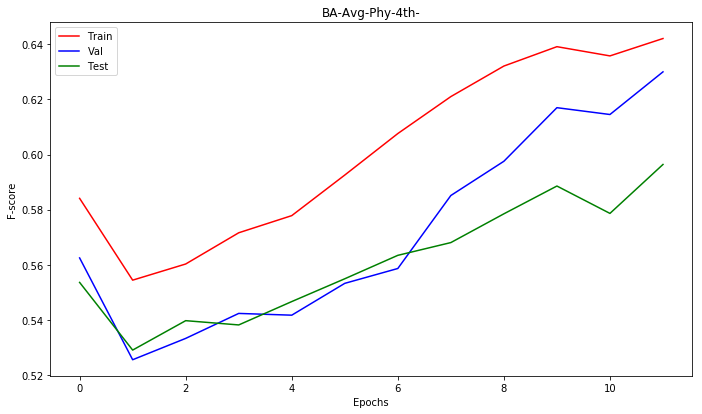

  1%|          | 8/839 [00:00<00:11, 71.31it/s]

==========Epoch11========
TRAIN: (0.6734740530522477, 0.6817640047675805, 0.6421170366030745)
VAL: (0.6810209336543606, 0.6746031746031746, 0.6300206860294492)
TEST: (0.6269689837426523, 0.6454891994917408, 0.5964104024726156)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.647783     0.688299    0.697917    0.670412    0.576271   
Recall       0.285559     0.910401    0.275720    0.925065    0.228956   
F-score      0.396383     0.783922    0.395280    0.777416    0.327711   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.657698  
Recall       0.897959  
F-score      0.759275  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.56it/s]


==========Epoch No:12==========
Training Loss: 499.628608793
Train: (0.680193942252479, 0.6889153754469607, 0.656621924845533, None)
                    0            1
Precision    0.650000     0.697618
Recall       0.324647     0.899123
F-score      0.433020     0.785656
Count      921.000000  1596.000000
--------
Val: (0.665450159802207, 0.6698412698412698, 0.6342443766888514, None)
                    0           1
Precision    0.652174    0.673786
Recall       0.308642    0.896641
F-score      0.418994    0.769401
Count      243.000000  387.000000
--------
Test: (0.6279733128427243, 0.6467598475222364, 0.6038413792890485, None)
                    0           1
Precision    0.572519    0.661585
Recall       0.252525    0.885714
F-score      0.350467    0.757417
Count      297.000000  490.000000




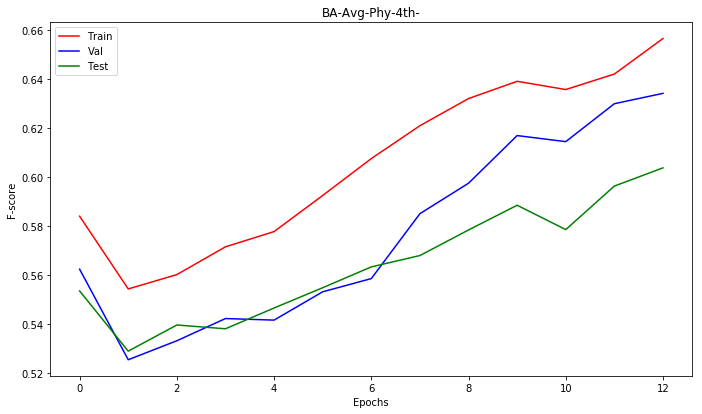

  1%|          | 8/839 [00:00<00:11, 72.27it/s]

==========Epoch12========
TRAIN: (0.680193942252479, 0.6889153754469607, 0.656621924845533)
VAL: (0.665450159802207, 0.6698412698412698, 0.6342443766888514)
TEST: (0.6279733128427243, 0.6467598475222364, 0.6038413792890485)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.650000     0.697618    0.652174    0.673786    0.572519   
Recall       0.324647     0.899123    0.308642    0.896641    0.252525   
F-score      0.433020     0.785656    0.418994    0.769401    0.350467   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.661585  
Recall       0.885714  
F-score      0.757417  
Count      490.000000  


100%|██████████| 839/839 [00:12<00:00, 66.44it/s]


==========Epoch No:13==========
Training Loss: 498.280812636
Train: (0.6818854908296825, 0.6873261819626539, 0.6483721695463416, None)
                    0            1
Precision    0.665025     0.691615
Recall       0.293160     0.914787
F-score      0.406933     0.787699
Count      921.000000  1596.000000
--------
Val: (0.6655163188871054, 0.665079365079365, 0.6191920231815304, None)
                    0           1
Precision    0.666667    0.664794
Recall       0.263374    0.917313
F-score      0.377581    0.770901
Count      243.000000  387.000000
--------
Test: (0.6355349791269337, 0.650571791613723, 0.6012401159928055, None)
                    0           1
Precision    0.594828    0.660209
Recall       0.232323    0.904082
F-score      0.334140    0.763135
Count      297.000000  490.000000




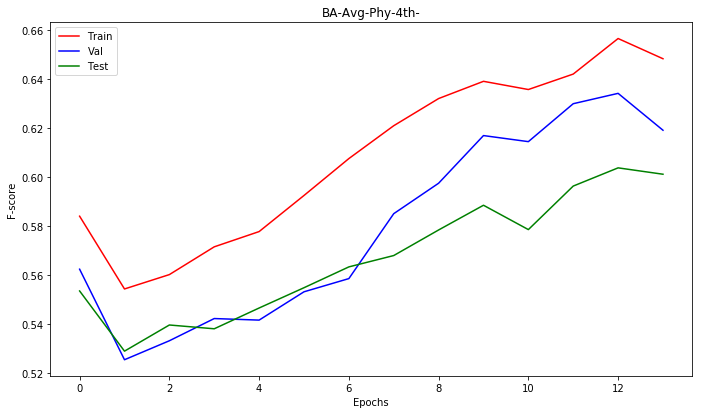

  1%|          | 9/839 [00:00<00:09, 86.66it/s]

==========Epoch12========
TRAIN: (0.680193942252479, 0.6889153754469607, 0.656621924845533)
VAL: (0.665450159802207, 0.6698412698412698, 0.6342443766888514)
TEST: (0.6279733128427243, 0.6467598475222364, 0.6038413792890485)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.650000     0.697618    0.652174    0.673786    0.572519   
Recall       0.324647     0.899123    0.308642    0.896641    0.252525   
F-score      0.433020     0.785656    0.418994    0.769401    0.350467   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.661585  
Recall       0.885714  
F-score      0.757417  
Count      490.000000  


100%|██████████| 839/839 [00:12<00:00, 66.71it/s]


==========Epoch No:14==========
Training Loss: 496.164185002
Train: (0.6814266080390577, 0.6912991656734208, 0.6635552079673982, None)
                    0            1
Precision    0.644000     0.703024
Recall       0.349620     0.888471
F-score      0.453202     0.784943
Count      921.000000  1596.000000
--------
Val: (0.6637980344356482, 0.6698412698412698, 0.6369897959183674, None)
                    0           1
Precision    0.644628    0.675835
Recall       0.320988    0.888889
F-score      0.428571    0.767857
Count      243.000000  387.000000
--------
Test: (0.6385105537609833, 0.6543837357052097, 0.616566328047833, None)
                    0           1
Precision    0.588652    0.668731
Recall       0.279461    0.881633
F-score      0.378995    0.760563
Count      297.000000  490.000000




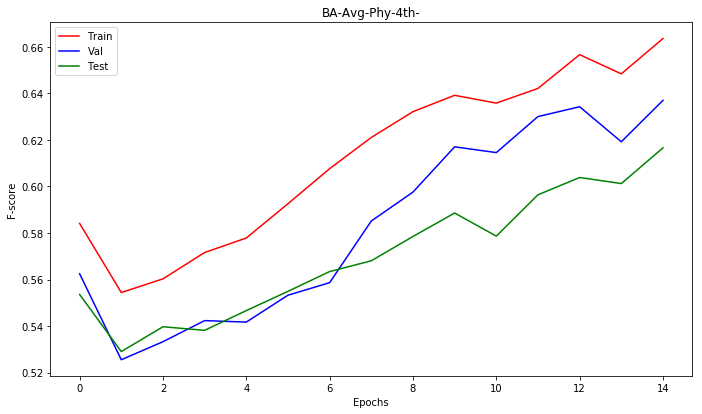

  1%|          | 5/839 [00:00<00:17, 46.64it/s]

==========Epoch14========
TRAIN: (0.6814266080390577, 0.6912991656734208, 0.6635552079673982)
VAL: (0.6637980344356482, 0.6698412698412698, 0.6369897959183674)
TEST: (0.6385105537609833, 0.6543837357052097, 0.616566328047833)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.644000     0.703024    0.644628    0.675835    0.588652   
Recall       0.349620     0.888471    0.320988    0.888889    0.279461   
F-score      0.453202     0.784943    0.428571    0.767857    0.378995   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.668731  
Recall       0.881633  
F-score      0.760563  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.99it/s]


==========Epoch No:15==========
Training Loss: 494.497045949
Train: (0.6803008675878915, 0.6905045689312674, 0.6628954086128074, None)
                    0            1
Precision    0.641434     0.702730
Recall       0.349620     0.887218
F-score      0.452565     0.784270
Count      921.000000  1596.000000
--------
Val: (0.6733560090702948, 0.6777777777777778, 0.6478497714270072, None)
                    0           1
Precision    0.658730    0.682540
Recall       0.341564    0.888889
F-score      0.449864    0.772166
Count      243.000000  387.000000
--------
Test: (0.6381298945880767, 0.6543837357052097, 0.6189417425656758, None)
                    0           1
Precision    0.585034    0.670312
Recall       0.289562    0.875510
F-score      0.387387    0.759292
Count      297.000000  490.000000




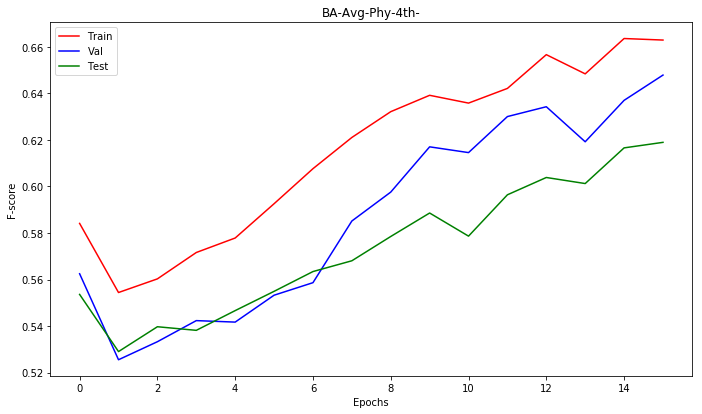

  1%|          | 7/839 [00:00<00:12, 67.67it/s]

==========Epoch15========
TRAIN: (0.6803008675878915, 0.6905045689312674, 0.6628954086128074)
VAL: (0.6733560090702948, 0.6777777777777778, 0.6478497714270072)
TEST: (0.6381298945880767, 0.6543837357052097, 0.6189417425656758)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.641434     0.702730    0.658730    0.682540    0.585034   
Recall       0.349620     0.887218    0.341564    0.888889    0.289562   
F-score      0.452565     0.784270    0.449864    0.772166    0.387387   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.670312  
Recall       0.875510  
F-score      0.759292  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 63.70it/s]


==========Epoch No:16==========
Training Loss: 493.223587185
Train: (0.6838091971133423, 0.6924910607866508, 0.6630771150329066, None)
                    0            1
Precision    0.652174     0.702065
Recall       0.342020     0.894737
F-score      0.448718     0.786777
Count      921.000000  1596.000000
--------
Val: (0.6741233766233767, 0.6746031746031746, 0.6371608564530471, None)
                    0           1
Precision    0.672727    0.675000
Recall       0.304527    0.906977
F-score      0.419263    0.773980
Count      243.000000  387.000000
--------
Test: (0.6407993147662804, 0.6556543837357052, 0.6159306414380828, None)
                    0           1
Precision    0.595588    0.668203
Recall       0.272727    0.887755
F-score      0.374134    0.762489
Count      297.000000  490.000000




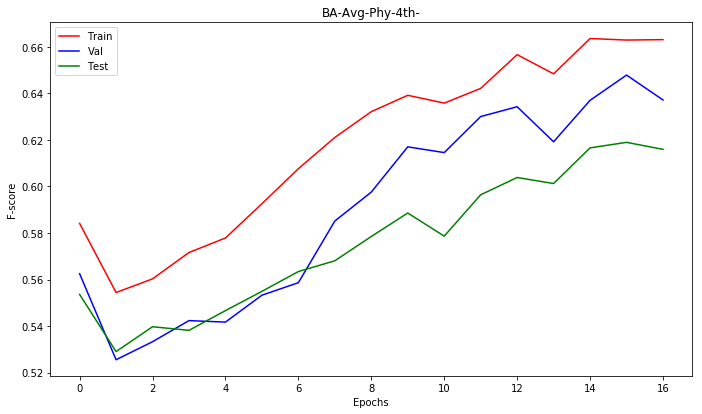

  1%|          | 8/839 [00:00<00:10, 77.44it/s]

==========Epoch15========
TRAIN: (0.6803008675878915, 0.6905045689312674, 0.6628954086128074)
VAL: (0.6733560090702948, 0.6777777777777778, 0.6478497714270072)
TEST: (0.6381298945880767, 0.6543837357052097, 0.6189417425656758)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.641434     0.702730    0.658730    0.682540    0.585034   
Recall       0.349620     0.887218    0.341564    0.888889    0.289562   
F-score      0.452565     0.784270    0.449864    0.772166    0.387387   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.670312  
Recall       0.875510  
F-score      0.759292  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 64.16it/s]


==========Epoch No:17==========
Training Loss: 491.395535067
Train: (0.6831384062556244, 0.6932856575288041, 0.6680185669629637, None)
                    0            1
Precision    0.642447     0.706620
Recall       0.364821     0.882832
F-score      0.465374     0.784958
Count      921.000000  1596.000000
--------
Val: (0.6747117061557947, 0.6793650793650794, 0.6508168306555403, None)
                    0           1
Precision    0.658915    0.684631
Recall       0.349794    0.886305
F-score      0.456989    0.772523
Count      243.000000  387.000000
--------
Test: (0.6412357713622187, 0.6569250317662008, 0.6247446722649904, None)
                    0           1
Precision    0.587097    0.674051
Recall       0.306397    0.869388
F-score      0.402655    0.759358
Count      297.000000  490.000000




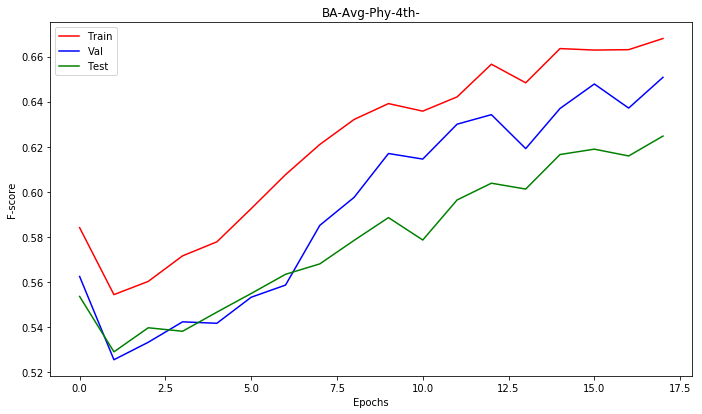

  1%|          | 7/839 [00:00<00:12, 66.80it/s]

==========Epoch17========
TRAIN: (0.6831384062556244, 0.6932856575288041, 0.6680185669629637)
VAL: (0.6747117061557947, 0.6793650793650794, 0.6508168306555403)
TEST: (0.6412357713622187, 0.6569250317662008, 0.6247446722649904)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.642447     0.706620    0.658915    0.684631    0.587097   
Recall       0.364821     0.882832    0.349794    0.886305    0.306397   
F-score      0.465374     0.784958    0.456989    0.772523    0.402655   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.674051  
Recall       0.869388  
F-score      0.759358  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.10it/s]


==========Epoch No:18==========
Training Loss: 490.866993055
Train: (0.6995643861601049, 0.7020262216924911, 0.6696670154363884, None)
                    0            1
Precision    0.691275     0.704348
Recall       0.335505     0.913534
F-score      0.451754     0.795417
Count      921.000000  1596.000000
--------
Val: (0.6767407972255881, 0.6746031746031746, 0.6342001111974378, None)
                    0           1
Precision    0.682692    0.673004
Recall       0.292181    0.914729
F-score      0.409222    0.775465
Count      243.000000  387.000000
--------
Test: (0.6513218574723976, 0.662007623888183, 0.6200923893377309, None)
                    0           1
Precision    0.620155    0.670213
Recall       0.269360    0.900000
F-score      0.375587    0.768293
Count      297.000000  490.000000




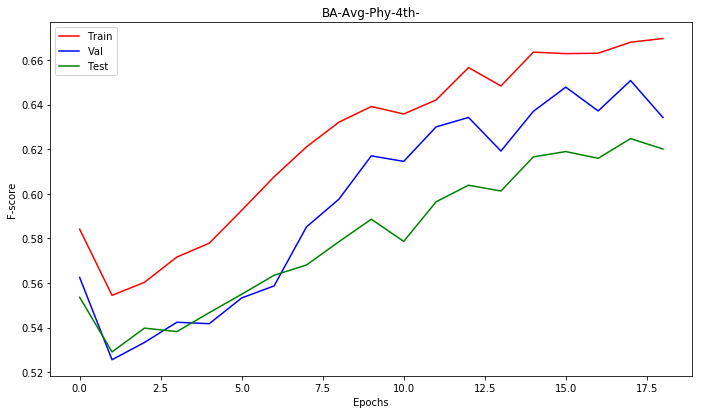

  1%|          | 6/839 [00:00<00:15, 53.08it/s]

==========Epoch17========
TRAIN: (0.6831384062556244, 0.6932856575288041, 0.6680185669629637)
VAL: (0.6747117061557947, 0.6793650793650794, 0.6508168306555403)
TEST: (0.6412357713622187, 0.6569250317662008, 0.6247446722649904)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.642447     0.706620    0.658915    0.684631    0.587097   
Recall       0.364821     0.882832    0.349794    0.886305    0.306397   
F-score      0.465374     0.784958    0.456989    0.772523    0.402655   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.674051  
Recall       0.869388  
F-score      0.759358  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.09it/s]


==========Epoch No:19==========
Training Loss: 490.070056632
Train: (0.6955026509090161, 0.7024235200635678, 0.6766623043995291, None)
                    0            1
Precision    0.668627     0.711011
Recall       0.370250     0.894110
F-score      0.476590     0.792118
Count      921.000000  1596.000000
--------
Val: (0.6790906349876379, 0.6793650793650794, 0.6447950196689806, None)
                    0           1
Precision    0.678261    0.679612
Recall       0.320988    0.904393
F-score      0.435754    0.776053
Count      243.000000  387.000000
--------
Test: (0.6453870726406916, 0.6594663278271918, 0.6237757114337864, None)
                    0           1
Precision    0.600000    0.672897
Recall       0.292929    0.881633
F-score      0.393665    0.763251
Count      297.000000  490.000000




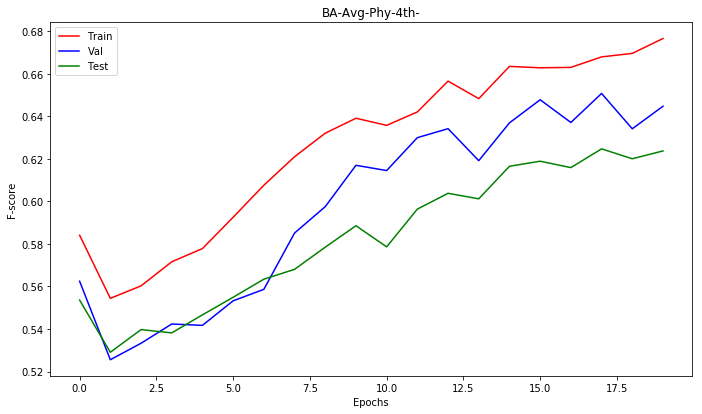

  1%|          | 5/839 [00:00<00:17, 49.03it/s]

==========Epoch17========
TRAIN: (0.6831384062556244, 0.6932856575288041, 0.6680185669629637)
VAL: (0.6747117061557947, 0.6793650793650794, 0.6508168306555403)
TEST: (0.6412357713622187, 0.6569250317662008, 0.6247446722649904)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.642447     0.706620    0.658915    0.684631    0.587097   
Recall       0.364821     0.882832    0.349794    0.886305    0.306397   
F-score      0.465374     0.784958    0.456989    0.772523    0.402655   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.674051  
Recall       0.869388  
F-score      0.759358  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.50it/s]


==========Epoch No:20==========
Training Loss: 490.021682456
Train: (0.6991785673713491, 0.7052046086611045, 0.6795877052905729, None)
                    0            1
Precision    0.675835     0.712649
Recall       0.373507     0.896617
F-score      0.481119     0.794118
Count      921.000000  1596.000000
--------
Val: (0.6836374600494483, 0.6825396825396826, 0.6483119006623571, None)
                    0           1
Precision    0.686957    0.681553
Recall       0.325103    0.906977
F-score      0.441341    0.778271
Count      243.000000  387.000000
--------
Test: (0.6455805671594854, 0.6594663278271918, 0.6229955919494251, None)
                    0           1
Precision    0.601399    0.672360
Recall       0.289562    0.883673
F-score      0.390909    0.763668
Count      297.000000  490.000000




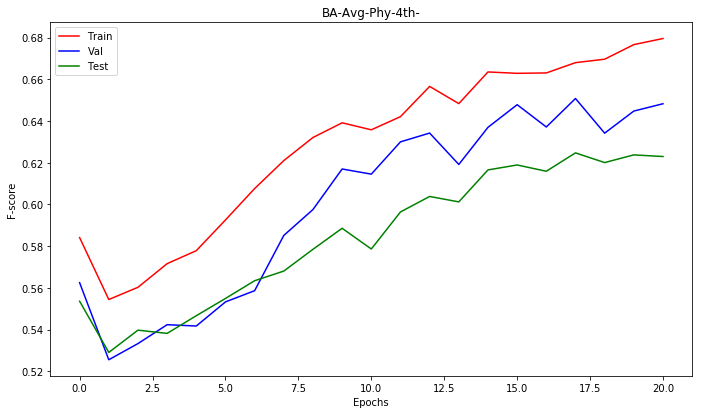

  1%|          | 7/839 [00:00<00:12, 64.91it/s]

==========Epoch17========
TRAIN: (0.6831384062556244, 0.6932856575288041, 0.6680185669629637)
VAL: (0.6747117061557947, 0.6793650793650794, 0.6508168306555403)
TEST: (0.6412357713622187, 0.6569250317662008, 0.6247446722649904)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.642447     0.706620    0.658915    0.684631    0.587097   
Recall       0.364821     0.882832    0.349794    0.886305    0.306397   
F-score      0.465374     0.784958    0.456989    0.772523    0.402655   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.674051  
Recall       0.869388  
F-score      0.759358  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.64it/s]


==========Epoch No:21==========
Training Loss: 488.059258789
Train: (0.7013777541573407, 0.7056019070321812, 0.6775438286444302, None)
                    0            1
Precision    0.685950     0.710280
Recall       0.360478     0.904762
F-score      0.472598     0.795812
Count      921.000000  1596.000000
--------
Val: (0.6826082460011031, 0.680952380952381, 0.6451771401892015, None)
                    0           1
Precision    0.687500    0.679537
Recall       0.316872    0.909561
F-score      0.433803    0.777901
Count      243.000000  387.000000
--------
Test: (0.6527922384228665, 0.6645489199491741, 0.6286225234128664, None)
                    0           1
Precision    0.615385    0.675466
Recall       0.296296    0.887755
F-score      0.400000    0.767196
Count      297.000000  490.000000




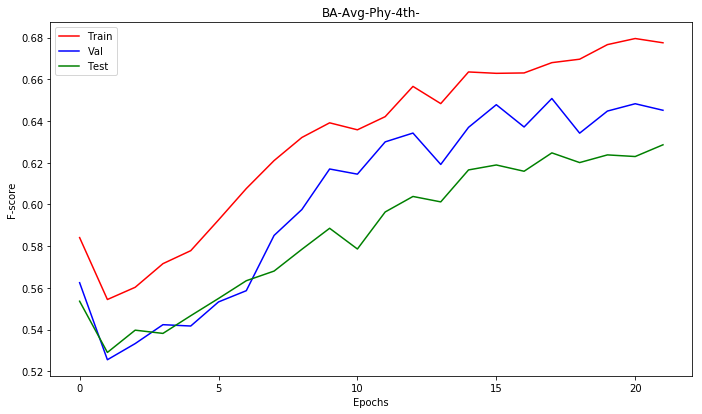

  1%|          | 8/839 [00:00<00:11, 71.10it/s]

==========Epoch17========
TRAIN: (0.6831384062556244, 0.6932856575288041, 0.6680185669629637)
VAL: (0.6747117061557947, 0.6793650793650794, 0.6508168306555403)
TEST: (0.6412357713622187, 0.6569250317662008, 0.6247446722649904)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.642447     0.706620    0.658915    0.684631    0.587097   
Recall       0.364821     0.882832    0.349794    0.886305    0.306397   
F-score      0.465374     0.784958    0.456989    0.772523    0.402655   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.674051  
Recall       0.869388  
F-score      0.759358  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.41it/s]


==========Epoch No:22==========
Training Loss: 487.832408592
Train: (0.7007919877991065, 0.7063965037743345, 0.6807869110389463, None)
                    0            1
Precision    0.679134     0.713290
Recall       0.374593     0.897870
F-score      0.482855     0.795007
Count      921.000000  1596.000000
--------
Val: (0.6813763125604525, 0.6825396825396826, 0.650951726844584, None)
                    0           1
Precision    0.677686    0.683694
Recall       0.337449    0.899225
F-score      0.450549    0.776786
Count      243.000000  387.000000
--------
Test: (0.6450488796223862, 0.6594663278271918, 0.6253052002168786, None)
                    0           1
Precision    0.597315    0.673981
Recall       0.299663    0.877551
F-score      0.399103    0.762411
Count      297.000000  490.000000




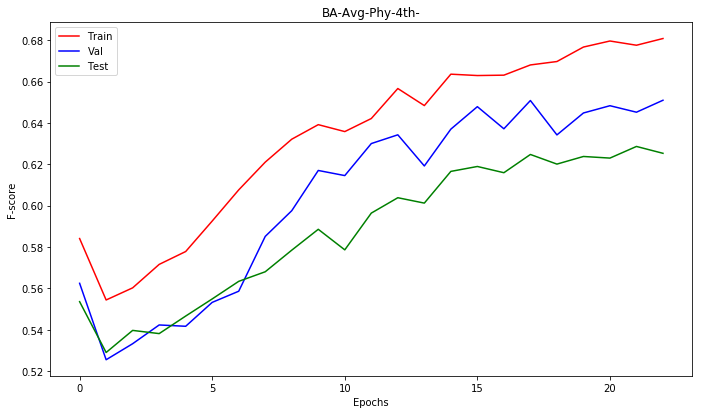

  1%|          | 7/839 [00:00<00:12, 65.64it/s]

==========Epoch22========
TRAIN: (0.7007919877991065, 0.7063965037743345, 0.6807869110389463)
VAL: (0.6813763125604525, 0.6825396825396826, 0.650951726844584)
TEST: (0.6450488796223862, 0.6594663278271918, 0.6253052002168786)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.679134     0.713290    0.677686    0.683694    0.597315   
Recall       0.374593     0.897870    0.337449    0.899225    0.299663   
F-score      0.482855     0.795007    0.450549    0.776786    0.399103   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.673981  
Recall       0.877551  
F-score      0.762411  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.48it/s]


==========Epoch No:23==========
Training Loss: 486.227682635
Train: (0.6994035122631302, 0.7056019070321812, 0.6804990637544589, None)
                    0            1
Precision    0.675097     0.713430
Recall       0.376764     0.895363
F-score      0.483624     0.794109
Count      921.000000  1596.000000
--------
Val: (0.6909733756516305, 0.6888888888888889, 0.6570844971637402, None)
                    0           1
Precision    0.697479    0.686888
Recall       0.341564    0.906977
F-score      0.458564    0.781737
Count      243.000000  387.000000
--------
Test: (0.650030726196676, 0.6632782719186785, 0.6306076816820726, None)
                    0           1
Precision    0.605263    0.677165
Recall       0.309764    0.877551
F-score      0.409800    0.764444
Count      297.000000  490.000000




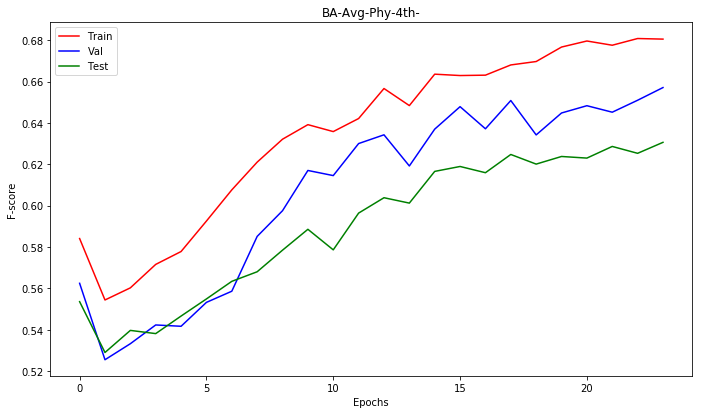

  1%|          | 8/839 [00:00<00:10, 77.64it/s]

==========Epoch23========
TRAIN: (0.6994035122631302, 0.7056019070321812, 0.6804990637544589)
VAL: (0.6909733756516305, 0.6888888888888889, 0.6570844971637402)
TEST: (0.650030726196676, 0.6632782719186785, 0.6306076816820726)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.675097     0.713430    0.697479    0.686888    0.605263   
Recall       0.376764     0.895363    0.341564    0.906977    0.309764   
F-score      0.483624     0.794109    0.458564    0.781737    0.409800   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.677165  
Recall       0.877551  
F-score      0.764444  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 61.09it/s]


==========Epoch No:24==========
Training Loss: 484.395700172
Train: (0.7001146603217757, 0.7075883988875645, 0.6860253142192886, None)
                    0            1
Precision    0.667877     0.718718
Recall       0.399566     0.885338
F-score      0.500000     0.793375
Count      921.000000  1596.000000
--------
Val: (0.6752260341214803, 0.6793650793650794, 0.6499986985380244, None)
                    0           1
Precision    0.661417    0.683897
Recall       0.345679    0.888889
F-score      0.454054    0.773034
Count      243.000000  387.000000
--------
Test: (0.6498633429657115, 0.6632782719186785, 0.6313342085809461, None)
                    0           1
Precision    0.603896    0.677725
Recall       0.313131    0.875510
F-score      0.412417    0.764025
Count      297.000000  490.000000




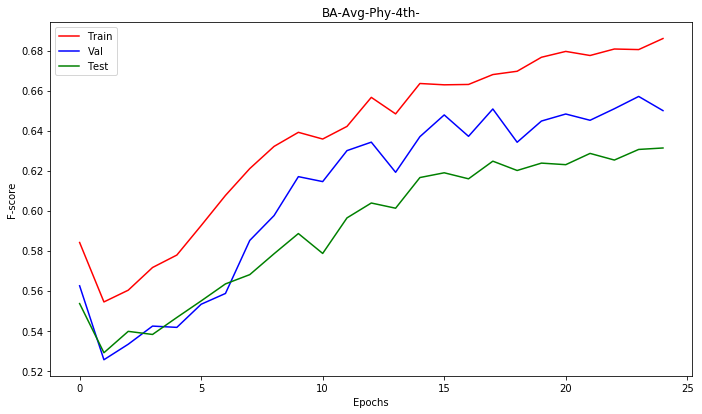

  1%|          | 7/839 [00:00<00:12, 66.74it/s]

==========Epoch23========
TRAIN: (0.6994035122631302, 0.7056019070321812, 0.6804990637544589)
VAL: (0.6909733756516305, 0.6888888888888889, 0.6570844971637402)
TEST: (0.650030726196676, 0.6632782719186785, 0.6306076816820726)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.675097     0.713430    0.697479    0.686888    0.605263   
Recall       0.376764     0.895363    0.341564    0.906977    0.309764   
F-score      0.483624     0.794109    0.458564    0.781737    0.409800   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.677165  
Recall       0.877551  
F-score      0.764444  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.88it/s]


==========Epoch No:25==========
Training Loss: 483.758495197
Train: (0.7058563956553955, 0.7111640842272546, 0.6876443634893001, None)
                    0            1
Precision    0.684411     0.718232
Recall       0.390879     0.895990
F-score      0.497581     0.797324
Count      921.000000  1596.000000
--------
Val: (0.6901654516228548, 0.6888888888888889, 0.6579326923076922, None)
                    0           1
Precision    0.694215    0.687623
Recall       0.345679    0.904393
F-score      0.461538    0.781250
Count      243.000000  387.000000
--------
Test: (0.6532974764545851, 0.6658195679796697, 0.6341165919124107, None)
                    0           1
Precision    0.610390    0.679305
Recall       0.316498    0.877551
F-score      0.416851    0.765806
Count      297.000000  490.000000




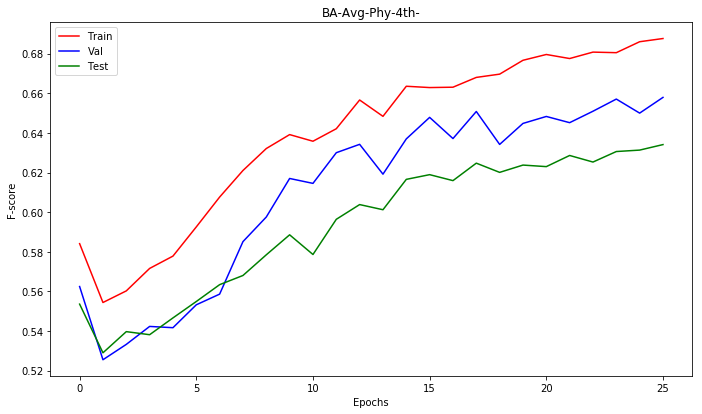

  1%|          | 5/839 [00:00<00:17, 48.46it/s]

==========Epoch25========
TRAIN: (0.7058563956553955, 0.7111640842272546, 0.6876443634893001)
VAL: (0.6901654516228548, 0.6888888888888889, 0.6579326923076922)
TEST: (0.6532974764545851, 0.6658195679796697, 0.6341165919124107)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.684411     0.718232    0.694215    0.687623    0.610390   
Recall       0.390879     0.895990    0.345679    0.904393    0.316498   
F-score      0.497581     0.797324    0.461538    0.781250    0.416851   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.679305  
Recall       0.877551  
F-score      0.765806  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 63.19it/s]


==========Epoch No:26==========
Training Loss: 481.899805143
Train: (0.703029011506928, 0.7103694874851013, 0.690122529895153, None)
                    0            1
Precision    0.670213     0.721966
Recall       0.410423     0.883459
F-score      0.509091     0.794590
Count      921.000000  1596.000000
--------
Val: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108, None)
                    0           1
Precision    0.686567    0.695565
Recall       0.378601    0.891473
F-score      0.488064    0.781427
Count      243.000000  387.000000
--------
Test: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129, None)
                    0           1
Precision    0.607362    0.682692
Recall       0.333333    0.869388
F-score      0.430435    0.764811
Count      297.000000  490.000000




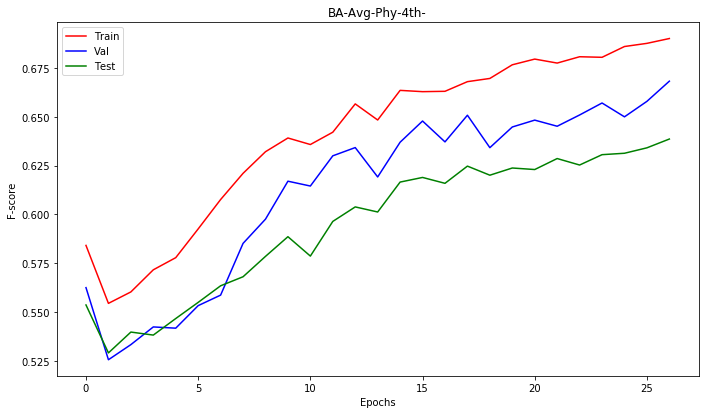

  1%|          | 6/839 [00:00<00:13, 59.85it/s]

==========Epoch26========
TRAIN: (0.703029011506928, 0.7103694874851013, 0.690122529895153)
VAL: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108)
TEST: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670213     0.721966    0.686567    0.695565    0.607362   
Recall       0.410423     0.883459    0.378601    0.891473    0.333333   
F-score      0.509091     0.794590    0.488064    0.781427    0.430435   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.682692  
Recall       0.869388  
F-score      0.764811  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.20it/s]


==========Epoch No:27==========
Training Loss: 481.603665516
Train: (0.7013900895110421, 0.7091775923718713, 0.6892680631463347, None)
                    0            1
Precision    0.666081     0.721766
Recall       0.411509     0.880952
F-score      0.508725     0.793454
Count      921.000000  1596.000000
--------
Val: (0.6879771648669097, 0.6904761904761905, 0.6648349502647156, None)
                    0           1
Precision    0.679104    0.693548
Recall       0.374486    0.888889
F-score      0.482759    0.779162
Count      243.000000  387.000000
--------
Test: (0.6565230652126063, 0.6683608640406608, 0.6376050278000187, None)
                    0           1
Precision    0.615385    0.681458
Recall       0.323232    0.877551
F-score      0.423841    0.767172
Count      297.000000  490.000000




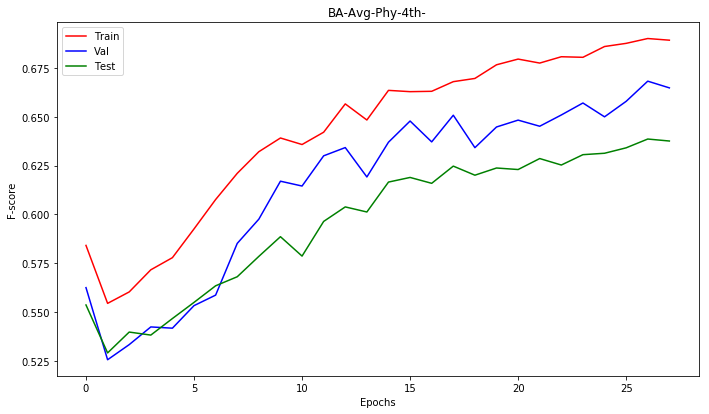

  1%|          | 7/839 [00:00<00:12, 68.48it/s]

==========Epoch26========
TRAIN: (0.703029011506928, 0.7103694874851013, 0.690122529895153)
VAL: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108)
TEST: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670213     0.721966    0.686567    0.695565    0.607362   
Recall       0.410423     0.883459    0.378601    0.891473    0.333333   
F-score      0.509091     0.794590    0.488064    0.781427    0.430435   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.682692  
Recall       0.869388  
F-score      0.764811  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.21it/s]


==========Epoch No:28==========
Training Loss: 479.681010336
Train: (0.702807134822756, 0.7103694874851013, 0.6906248122741896, None)
                    0            1
Precision    0.668421     0.722650
Recall       0.413681     0.881579
F-score      0.511066     0.794242
Count      921.000000  1596.000000
--------
Val: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108, None)
                    0           1
Precision    0.686567    0.695565
Recall       0.378601    0.891473
F-score      0.488064    0.781427
Count      243.000000  387.000000
--------
Test: (0.6579236380389355, 0.6696315120711563, 0.6400310118992999, None)
                    0           1
Precision    0.616352    0.683121
Recall       0.329966    0.875510
F-score      0.429825    0.767442
Count      297.000000  490.000000




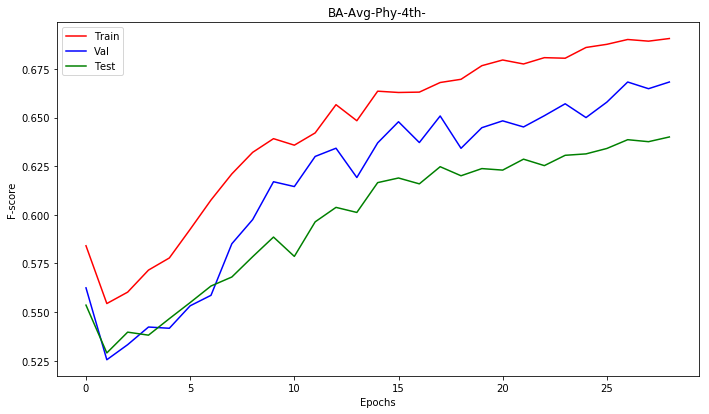

  1%|          | 6/839 [00:00<00:15, 54.51it/s]

==========Epoch26========
TRAIN: (0.703029011506928, 0.7103694874851013, 0.690122529895153)
VAL: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108)
TEST: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670213     0.721966    0.686567    0.695565    0.607362   
Recall       0.410423     0.883459    0.378601    0.891473    0.333333   
F-score      0.509091     0.794590    0.488064    0.781427    0.430435   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.682692  
Recall       0.869388  
F-score      0.764811  
Count      490.000000  


100%|██████████| 839/839 [00:15<00:00, 55.07it/s]


==========Epoch No:29==========
Training Loss: 478.982400492
Train: (0.7040821032627396, 0.7111640842272546, 0.6908042442934098, None)
                    0            1
Precision    0.672598     0.722251
Recall       0.410423     0.884712
F-score      0.509777     0.795269
Count      921.000000  1596.000000
--------
Val: (0.6861893163492231, 0.6888888888888889, 0.6627370751901415, None)
                    0           1
Precision    0.676692    0.692153
Recall       0.370370    0.888889
F-score      0.478723    0.778281
Count      243.000000  387.000000
--------
Test: (0.6579236380389355, 0.6696315120711563, 0.6400310118992999, None)
                    0           1
Precision    0.616352    0.683121
Recall       0.329966    0.875510
F-score      0.429825    0.767442
Count      297.000000  490.000000




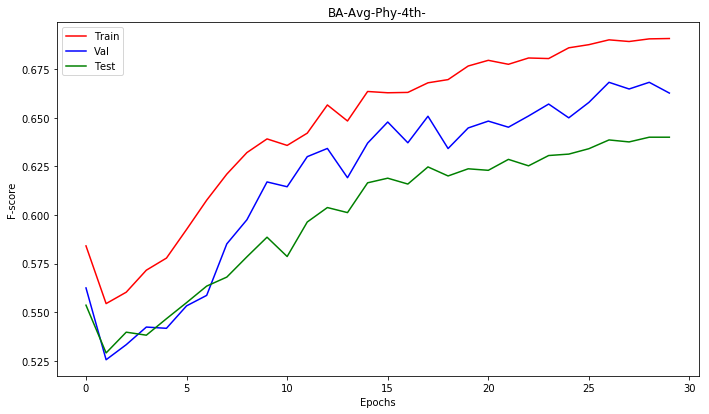

  1%|          | 8/839 [00:00<00:10, 79.15it/s]

==========Epoch26========
TRAIN: (0.703029011506928, 0.7103694874851013, 0.690122529895153)
VAL: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108)
TEST: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670213     0.721966    0.686567    0.695565    0.607362   
Recall       0.410423     0.883459    0.378601    0.891473    0.333333   
F-score      0.509091     0.794590    0.488064    0.781427    0.430435   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.682692  
Recall       0.869388  
F-score      0.764811  
Count      490.000000  


100%|██████████| 839/839 [00:12<00:00, 64.66it/s]


==========Epoch No:30==========
Training Loss: 478.675089374
Train: (0.7078617344920065, 0.7155343663090982, 0.6990443729618344, None)
                    0            1
Precision    0.668863     0.730366
Recall       0.440825     0.874060
F-score      0.531414     0.795779
Count      921.000000  1596.000000
--------
Val: (0.6860342382161823, 0.6904761904761905, 0.6677402597402597, None)
                    0           1
Precision    0.669014    0.696721
Recall       0.390947    0.878553
F-score      0.493506    0.777143
Count      243.000000  387.000000
--------
Test: (0.6473836519459365, 0.662007623888183, 0.6364028514548588, None)
                    0           1
Precision    0.589595    0.682410
Recall       0.343434    0.855102
F-score      0.434043    0.759058
Count      297.000000  490.000000




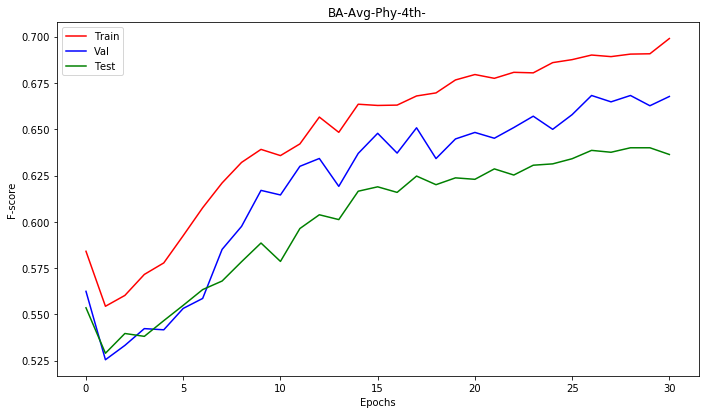

  1%|          | 7/839 [00:00<00:13, 62.80it/s]

==========Epoch26========
TRAIN: (0.703029011506928, 0.7103694874851013, 0.690122529895153)
VAL: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108)
TEST: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670213     0.721966    0.686567    0.695565    0.607362   
Recall       0.410423     0.883459    0.378601    0.891473    0.333333   
F-score      0.509091     0.794590    0.488064    0.781427    0.430435   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.682692  
Recall       0.869388  
F-score      0.764811  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.89it/s]


==========Epoch No:31==========
Training Loss: 477.811595112
Train: (0.6995987398201797, 0.7079856972586412, 0.6889079153043218, None)
                    0            1
Precision    0.660345     0.722251
Recall       0.415852     0.876566
F-score      0.510326     0.791962
Count      921.000000  1596.000000
--------
Val: (0.682897793263647, 0.6873015873015873, 0.6628897497027889, None)
                    0           1
Precision    0.666667    0.693089
Recall       0.378601    0.881137
F-score      0.482940    0.775882
Count      243.000000  387.000000
--------
Test: (0.6444640227638557, 0.6594663278271918, 0.628955043034663, None)
                    0           1
Precision    0.591195    0.676752
Recall       0.316498    0.867347
F-score      0.412281    0.760286
Count      297.000000  490.000000




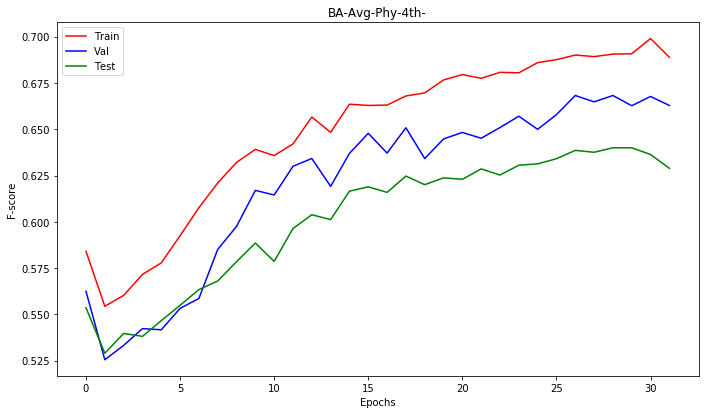

  1%|          | 7/839 [00:00<00:11, 69.38it/s]

==========Epoch26========
TRAIN: (0.703029011506928, 0.7103694874851013, 0.690122529895153)
VAL: (0.6920941089483458, 0.6936507936507936, 0.6682725405184108)
TEST: (0.6542639565904897, 0.6670902160101652, 0.6386235839852129)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670213     0.721966    0.686567    0.695565    0.607362   
Recall       0.410423     0.883459    0.378601    0.891473    0.333333   
F-score      0.509091     0.794590    0.488064    0.781427    0.430435   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.682692  
Recall       0.869388  
F-score      0.764811  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.46it/s]


==========Epoch No:32==========
Training Loss: 477.639792398
Train: (0.704295847582602, 0.7115613825983313, 0.6918150462352992, None)
                    0            1
Precision    0.671353     0.723306
Recall       0.414767     0.882832
F-score      0.512752     0.795147
Count      921.000000  1596.000000
--------
Val: (0.696211053029782, 0.6968253968253968, 0.671710130772106, None)
                    0           1
Precision    0.694030    0.697581
Recall       0.382716    0.894057
F-score      0.493369    0.783692
Count      243.000000  387.000000
--------
Test: (0.6478289265826256, 0.662007623888183, 0.6317240352508222, None)
                    0           1
Precision    0.597484    0.678344
Recall       0.319865    0.869388
F-score      0.416667    0.762075
Count      297.000000  490.000000




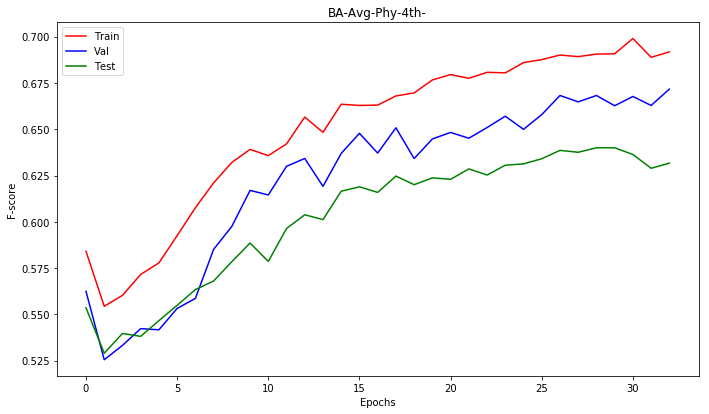

  1%|          | 7/839 [00:00<00:11, 69.68it/s]

==========Epoch32========
TRAIN: (0.704295847582602, 0.7115613825983313, 0.6918150462352992)
VAL: (0.696211053029782, 0.6968253968253968, 0.671710130772106)
TEST: (0.6478289265826256, 0.662007623888183, 0.6317240352508222)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671353     0.723306    0.694030    0.697581    0.597484   
Recall       0.414767     0.882832    0.382716    0.894057    0.319865   
F-score      0.512752     0.795147    0.493369    0.783692    0.416667   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.678344  
Recall       0.869388  
F-score      0.762075  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.37it/s]


==========Epoch No:33==========
Training Loss: 476.491661102
Train: (0.7065236074629966, 0.7135478744537147, 0.6943474572977278, None)
                    0            1
Precision    0.674216     0.725167
Recall       0.420195     0.882832
F-score      0.517726     0.796270
Count      921.000000  1596.000000
--------
Val: (0.6903254111132964, 0.692063492063492, 0.6661785336065688, None)
                    0           1
Precision    0.684211    0.694165
Recall       0.374486    0.891473
F-score      0.484043    0.780543
Count      243.000000  387.000000
--------
Test: (0.6526692079627276, 0.6658195679796697, 0.636906040756597, None)
                    0           1
Precision    0.604938    0.681600
Recall       0.329966    0.869388
F-score      0.427015    0.764126
Count      297.000000  490.000000




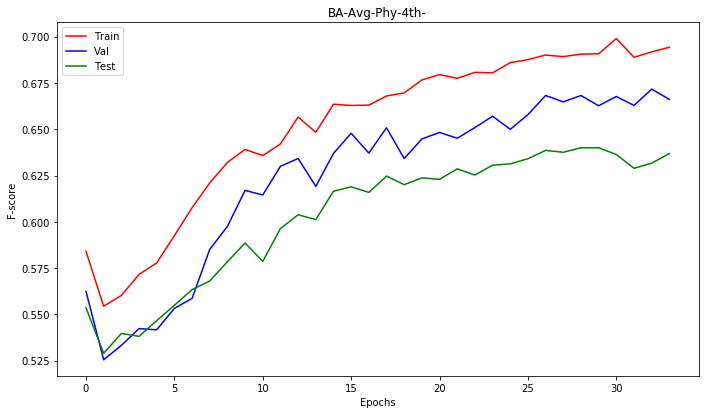

  1%|          | 5/839 [00:00<00:19, 43.57it/s]

==========Epoch32========
TRAIN: (0.704295847582602, 0.7115613825983313, 0.6918150462352992)
VAL: (0.696211053029782, 0.6968253968253968, 0.671710130772106)
TEST: (0.6478289265826256, 0.662007623888183, 0.6317240352508222)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671353     0.723306    0.694030    0.697581    0.597484   
Recall       0.414767     0.882832    0.382716    0.894057    0.319865   
F-score      0.512752     0.795147    0.493369    0.783692    0.416667   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.678344  
Recall       0.869388  
F-score      0.762075  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 59.97it/s]


==========Epoch No:34==========
Training Loss: 475.772612035
Train: (0.7084532770876868, 0.7155343663090982, 0.6975048618496833, None)
                    0            1
Precision    0.674617     0.727979
Recall       0.429967     0.880326
F-score      0.525199     0.796937
Count      921.000000  1596.000000
--------
Val: (0.6944615058773694, 0.6952380952380952, 0.6696199920229958, None)
                    0           1
Precision    0.691729    0.696177
Recall       0.378601    0.894057
F-score      0.489362    0.782805
Count      243.000000  387.000000
--------
Test: (0.6540273553806433, 0.6670902160101652, 0.6399488642127648, None)
                    0           1
Precision    0.604790    0.683871
Recall       0.340067    0.865306
F-score      0.435345    0.763964
Count      297.000000  490.000000




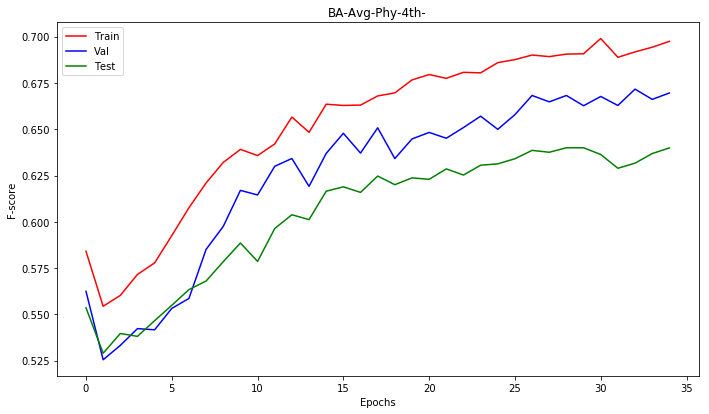

  1%|          | 6/839 [00:00<00:16, 49.79it/s]

==========Epoch32========
TRAIN: (0.704295847582602, 0.7115613825983313, 0.6918150462352992)
VAL: (0.696211053029782, 0.6968253968253968, 0.671710130772106)
TEST: (0.6478289265826256, 0.662007623888183, 0.6317240352508222)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671353     0.723306    0.694030    0.697581    0.597484   
Recall       0.414767     0.882832    0.382716    0.894057    0.319865   
F-score      0.512752     0.795147    0.493369    0.783692    0.416667   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.678344  
Recall       0.869388  
F-score      0.762075  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.73it/s]


==========Epoch No:35==========
Training Loss: 474.811510414
Train: (0.7057601946160823, 0.7123559793404847, 0.6916576117494216, None)
                    0            1
Precision    0.676840     0.722449
Recall       0.409338     0.887218
F-score      0.510149     0.796400
Count      921.000000  1596.000000
--------
Val: (0.6975428571428571, 0.6968253968253968, 0.6702137388561186, None)
                    0           1
Precision    0.700000    0.696000
Recall       0.374486    0.899225
F-score      0.487936    0.784667
Count      243.000000  387.000000
--------
Test: (0.6415402218473241, 0.6569250317662008, 0.6225089703677508, None)
                    0           1
Precision    0.590604    0.672414
Recall       0.296296    0.875510
F-score      0.394619    0.760638
Count      297.000000  490.000000




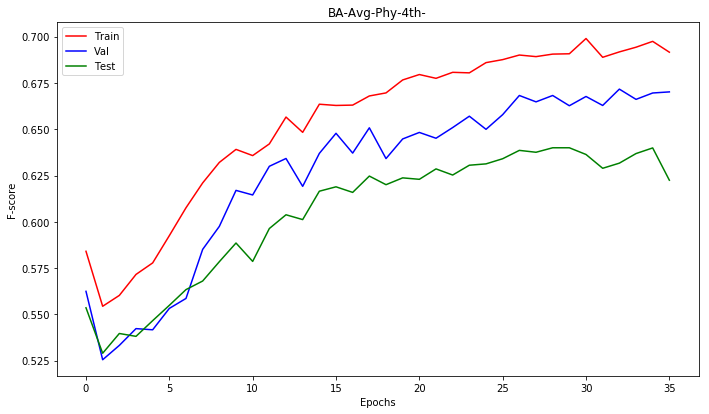

  1%|          | 6/839 [00:00<00:17, 48.43it/s]

==========Epoch32========
TRAIN: (0.704295847582602, 0.7115613825983313, 0.6918150462352992)
VAL: (0.696211053029782, 0.6968253968253968, 0.671710130772106)
TEST: (0.6478289265826256, 0.662007623888183, 0.6317240352508222)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671353     0.723306    0.694030    0.697581    0.597484   
Recall       0.414767     0.882832    0.382716    0.894057    0.319865   
F-score      0.512752     0.795147    0.493369    0.783692    0.416667   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.678344  
Recall       0.869388  
F-score      0.762075  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 61.30it/s]


==========Epoch No:36==========
Training Loss: 473.504218459
Train: (0.7092243885251435, 0.7155343663090982, 0.6958959355841009, None)
                    0            1
Precision    0.680776     0.725641
Recall       0.419110     0.886591
F-score      0.518817     0.798082
Count      921.000000  1596.000000
--------
Val: (0.687360163394142, 0.6888888888888889, 0.6611886079628015, None)
                    0           1
Precision    0.682171    0.690619
Recall       0.362140    0.894057
F-score      0.473118    0.779279
Count      243.000000  387.000000
--------
Test: (0.6428997294044808, 0.6581956797966964, 0.62649713593182, None)
                    0           1
Precision    0.589744    0.675119
Recall       0.309764    0.869388
F-score      0.406181    0.760036
Count      297.000000  490.000000




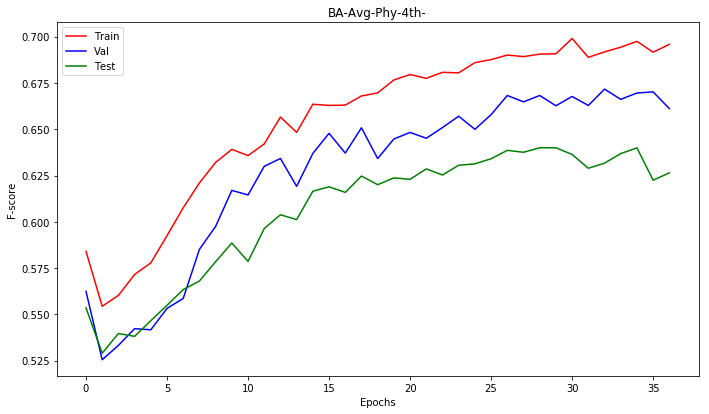

  1%|          | 5/839 [00:00<00:17, 46.54it/s]

==========Epoch32========
TRAIN: (0.704295847582602, 0.7115613825983313, 0.6918150462352992)
VAL: (0.696211053029782, 0.6968253968253968, 0.671710130772106)
TEST: (0.6478289265826256, 0.662007623888183, 0.6317240352508222)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671353     0.723306    0.694030    0.697581    0.597484   
Recall       0.414767     0.882832    0.382716    0.894057    0.319865   
F-score      0.512752     0.795147    0.493369    0.783692    0.416667   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.678344  
Recall       0.869388  
F-score      0.762075  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 61.73it/s]


==========Epoch No:37==========
Training Loss: 472.346201941
Train: (0.708973332062677, 0.7155343663090982, 0.6963860397719712, None)
                    0            1
Precision    0.678883     0.726337
Recall       0.422367     0.884712
F-score      0.520750     0.797740
Count      921.000000  1596.000000
--------
Val: (0.6968575601105722, 0.6968253968253968, 0.6709682001614206, None)
                    0           1
Precision    0.696970    0.696787
Recall       0.378601    0.896641
F-score      0.490667    0.784181
Count      243.000000  387.000000
--------
Test: (0.6343693113075458, 0.6518424396442185, 0.6206480663861853, None)
                    0           1
Precision    0.572327    0.671975
Recall       0.306397    0.861224
F-score      0.399123    0.754919
Count      297.000000  490.000000




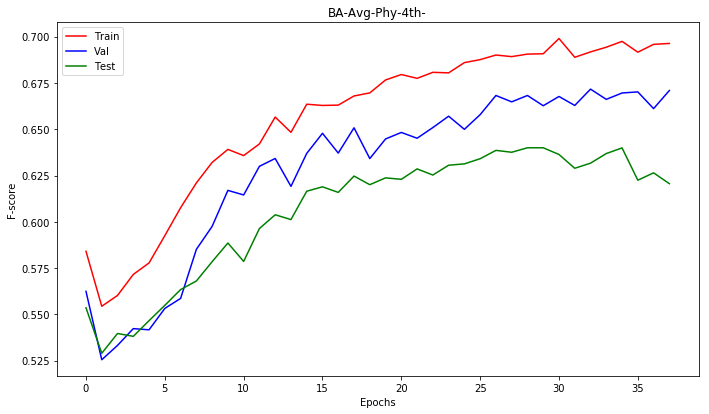

  1%|          | 7/839 [00:00<00:13, 62.24it/s]

==========Epoch32========
TRAIN: (0.704295847582602, 0.7115613825983313, 0.6918150462352992)
VAL: (0.696211053029782, 0.6968253968253968, 0.671710130772106)
TEST: (0.6478289265826256, 0.662007623888183, 0.6317240352508222)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671353     0.723306    0.694030    0.697581    0.597484   
Recall       0.414767     0.882832    0.382716    0.894057    0.319865   
F-score      0.512752     0.795147    0.493369    0.783692    0.416667   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.678344  
Recall       0.869388  
F-score      0.762075  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.13it/s]


==========Epoch No:38==========
Training Loss: 472.727327645
Train: (0.7088496491433206, 0.7163289630512515, 0.699734560732731, None)
                    0            1
Precision    0.671074     0.730649
Recall       0.440825     0.875313
F-score      0.532110     0.796465
Count      921.000000  1596.000000
--------
Val: (0.7025072886297377, 0.7031746031746032, 0.6806925035630181, None)
                    0           1
Precision    0.700000    0.704082
Recall       0.403292    0.891473
F-score      0.511749    0.786773
Count      243.000000  387.000000
--------
Test: (0.6409713670989782, 0.6569250317662008, 0.6289549364024674, None)
                    0           1
Precision    0.580838    0.677419
Recall       0.326599    0.857143
F-score      0.418103    0.756757
Count      297.000000  490.000000




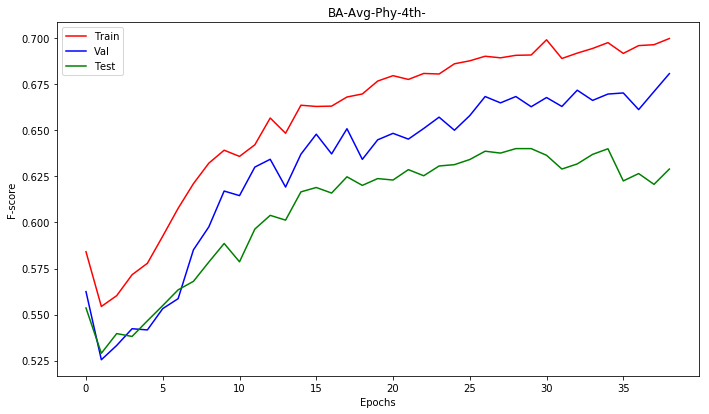

  1%|          | 7/839 [00:00<00:11, 69.45it/s]

==========Epoch38========
TRAIN: (0.7088496491433206, 0.7163289630512515, 0.699734560732731)
VAL: (0.7025072886297377, 0.7031746031746032, 0.6806925035630181)
TEST: (0.6409713670989782, 0.6569250317662008, 0.6289549364024674)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.671074     0.730649    0.700000    0.704082    0.580838   
Recall       0.440825     0.875313    0.403292    0.891473    0.326599   
F-score      0.532110     0.796465    0.511749    0.786773    0.418103   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.677419  
Recall       0.857143  
F-score      0.756757  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 61.63it/s]


==========Epoch No:39==========
Training Loss: 471.115387619
Train: (0.7108027181621349, 0.7183154549066348, 0.702941765297074, None)
                    0            1
Precision    0.670968     0.733790
Recall       0.451683     0.872180
F-score      0.539909     0.797023
Count      921.000000  1596.000000
--------
Val: (0.7042124303056297, 0.7047619047619048, 0.682739114481409, None)
                    0           1
Precision    0.702128    0.705521
Recall       0.407407    0.891473
F-score      0.515625    0.787671
Count      243.000000  387.000000
--------
Test: (0.6441927129247399, 0.6594663278271918, 0.6330227442285732, None)
                    0           1
Precision    0.584795    0.680195
Recall       0.336700    0.855102
F-score      0.427350    0.757685
Count      297.000000  490.000000




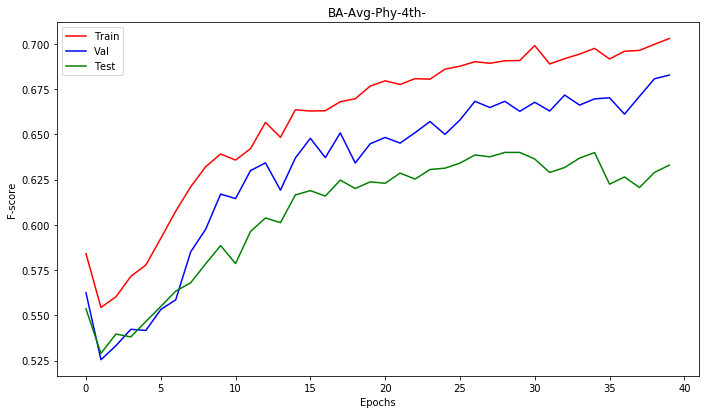

  1%|          | 8/839 [00:00<00:11, 71.42it/s]

==========Epoch39========
TRAIN: (0.7108027181621349, 0.7183154549066348, 0.702941765297074)
VAL: (0.7042124303056297, 0.7047619047619048, 0.682739114481409)
TEST: (0.6441927129247399, 0.6594663278271918, 0.6330227442285732)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670968     0.733790    0.702128    0.705521    0.584795   
Recall       0.451683     0.872180    0.407407    0.891473    0.336700   
F-score      0.539909     0.797023    0.515625    0.787671    0.427350   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.680195  
Recall       0.855102  
F-score      0.757685  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 62.94it/s]


==========Epoch No:40==========
Training Loss: 470.522131488
Train: (0.7137949630951739, 0.7203019467620183, 0.7033398590725667, None)
                    0            1
Precision    0.681742     0.732292
Recall       0.441911     0.880952
F-score      0.536232     0.799772
Count      921.000000  1596.000000
--------
Val: (0.695107554257916, 0.6952380952380952, 0.6688679001253691, None)
                    0           1
Precision    0.694656    0.695391
Recall       0.374486    0.896641
F-score      0.486631    0.783296
Count      243.000000  387.000000
--------
Test: (0.6409859575007048, 0.6569250317662008, 0.6282766852410248, None)
                    0           1
Precision    0.581818    0.676849
Recall       0.323232    0.859184
F-score      0.415584    0.757194
Count      297.000000  490.000000




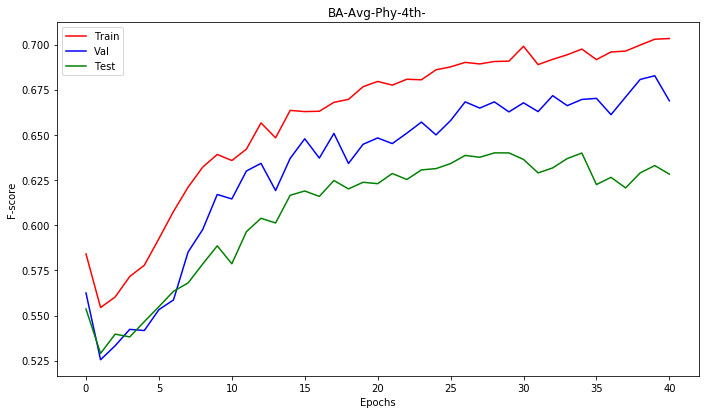

  0%|          | 4/839 [00:00<00:24, 34.17it/s]

==========Epoch39========
TRAIN: (0.7108027181621349, 0.7183154549066348, 0.702941765297074)
VAL: (0.7042124303056297, 0.7047619047619048, 0.682739114481409)
TEST: (0.6441927129247399, 0.6594663278271918, 0.6330227442285732)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670968     0.733790    0.702128    0.705521    0.584795   
Recall       0.451683     0.872180    0.407407    0.891473    0.336700   
F-score      0.539909     0.797023    0.515625    0.787671    0.427350   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.680195  
Recall       0.855102  
F-score      0.757685  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 59.96it/s]


==========Epoch No:41==========
Training Loss: 468.619642466
Train: (0.7138258219253909, 0.7210965435041716, 0.7065133251807786, None)
                    0            1
Precision    0.674086     0.736758
Recall       0.460369     0.871554
F-score      0.547097     0.798507
Count      921.000000  1596.000000
--------
Val: (0.6967679275258873, 0.6984126984126984, 0.6752205921188258, None)
                    0           1
Precision    0.690647    0.700611
Recall       0.395062    0.888889
F-score      0.502618    0.783599
Count      243.000000  387.000000
--------
Test: (0.6442083319676928, 0.6594663278271918, 0.6323675698240692, None)
                    0           1
Precision    0.585799    0.679612
Recall       0.333333    0.857143
F-score      0.424893    0.758123
Count      297.000000  490.000000




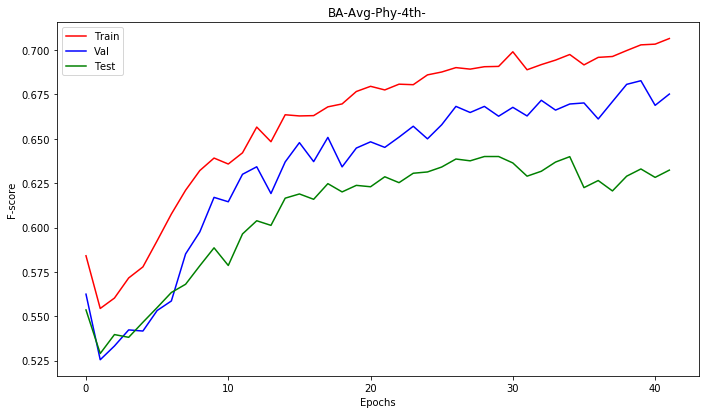

  1%|          | 7/839 [00:00<00:12, 66.28it/s]

==========Epoch39========
TRAIN: (0.7108027181621349, 0.7183154549066348, 0.702941765297074)
VAL: (0.7042124303056297, 0.7047619047619048, 0.682739114481409)
TEST: (0.6441927129247399, 0.6594663278271918, 0.6330227442285732)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.670968     0.733790    0.702128    0.705521    0.584795   
Recall       0.451683     0.872180    0.407407    0.891473    0.336700   
F-score      0.539909     0.797023    0.515625    0.787671    0.427350   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.680195  
Recall       0.855102  
F-score      0.757685  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.74it/s]


==========Epoch No:42==========
Training Loss: 468.266923115
Train: (0.7174855868987087, 0.7246722288438617, 0.7118298945273382, None)
                    0            1
Precision    0.674847     0.742091
Recall       0.477742     0.867168
F-score      0.559441     0.799769
Count      921.000000  1596.000000
--------
Val: (0.7098578185826507, 0.7111111111111111, 0.6921165240289663, None)
                    0           1
Precision    0.704698    0.713098
Recall       0.432099    0.886305
F-score      0.535714    0.790323
Count      243.000000  387.000000
--------
Test: (0.6520800605079868, 0.6658195679796697, 0.6420516429185119, None)
                    0           1
Precision    0.595506    0.686371
Recall       0.356902    0.853061
F-score      0.446316    0.760692
Count      297.000000  490.000000




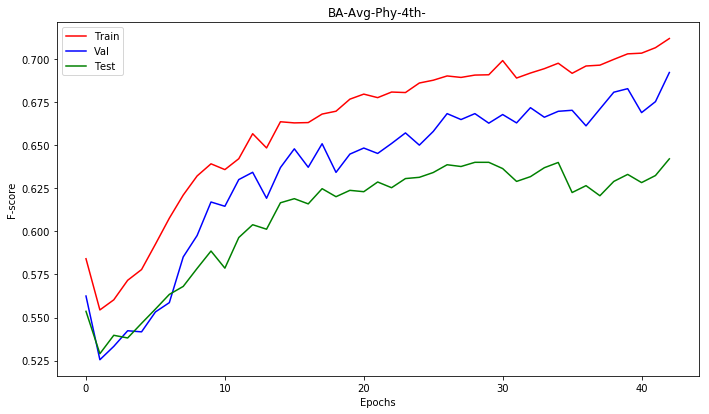

  1%|          | 6/839 [00:00<00:14, 57.17it/s]

==========Epoch42========
TRAIN: (0.7174855868987087, 0.7246722288438617, 0.7118298945273382)
VAL: (0.7098578185826507, 0.7111111111111111, 0.6921165240289663)
TEST: (0.6520800605079868, 0.6658195679796697, 0.6420516429185119)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674847     0.742091    0.704698    0.713098    0.595506   
Recall       0.477742     0.867168    0.432099    0.886305    0.356902   
F-score      0.559441     0.799769    0.535714    0.790323    0.446316   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.686371  
Recall       0.853061  
F-score      0.760692  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.64it/s]


==========Epoch No:43==========
Training Loss: 467.485895649
Train: (0.7154488865833677, 0.7226857369884784, 0.7088762088054981, None)
                    0            1
Precision    0.674491     0.739084
Recall       0.467970     0.869674
F-score      0.552564     0.799079
Count      921.000000  1596.000000
--------
Val: (0.7092813051146385, 0.7095238095238096, 0.6888401776438219, None)
                    0           1
Precision    0.708333    0.709877
Recall       0.419753    0.891473
F-score      0.527132    0.790378
Count      243.000000  387.000000
--------
Test: (0.6474103706766049, 0.662007623888183, 0.6357613804656733, None)
                    0           1
Precision    0.590643    0.681818
Recall       0.340067    0.857143
F-score      0.431624    0.759494
Count      297.000000  490.000000




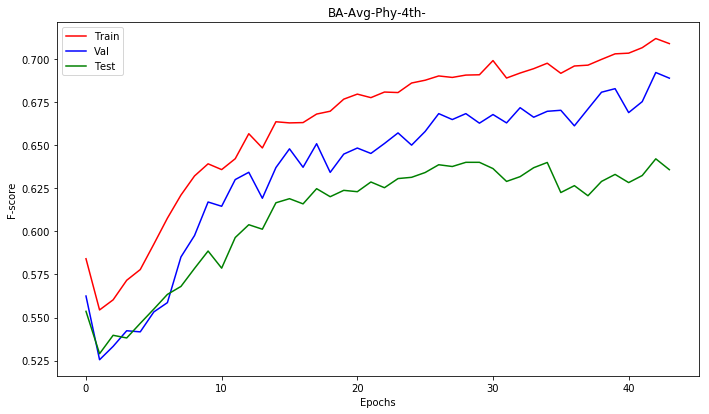

  1%|          | 8/839 [00:00<00:10, 75.97it/s]

==========Epoch42========
TRAIN: (0.7174855868987087, 0.7246722288438617, 0.7118298945273382)
VAL: (0.7098578185826507, 0.7111111111111111, 0.6921165240289663)
TEST: (0.6520800605079868, 0.6658195679796697, 0.6420516429185119)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674847     0.742091    0.704698    0.713098    0.595506   
Recall       0.477742     0.867168    0.432099    0.886305    0.356902   
F-score      0.559441     0.799769    0.535714    0.790323    0.446316   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.686371  
Recall       0.853061  
F-score      0.760692  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.31it/s]


==========Epoch No:44==========
Training Loss: 465.963837057
Train: (0.7176634310984372, 0.7246722288438617, 0.7111642925001644, None)
                    0            1
Precision    0.677570     0.740800
Recall       0.472313     0.870301
F-score      0.556622     0.800346
Count      921.000000  1596.000000
--------
Val: (0.7042124303056297, 0.7047619047619048, 0.682739114481409, None)
                    0           1
Precision    0.702128    0.705521
Recall       0.407407    0.891473
F-score      0.515625    0.787671
Count      243.000000  387.000000
--------
Test: (0.6457823269920536, 0.6607369758576874, 0.6353545980878079, None)
                    0           1
Precision    0.586207    0.681892
Recall       0.343434    0.853061
F-score      0.433121    0.757933
Count      297.000000  490.000000




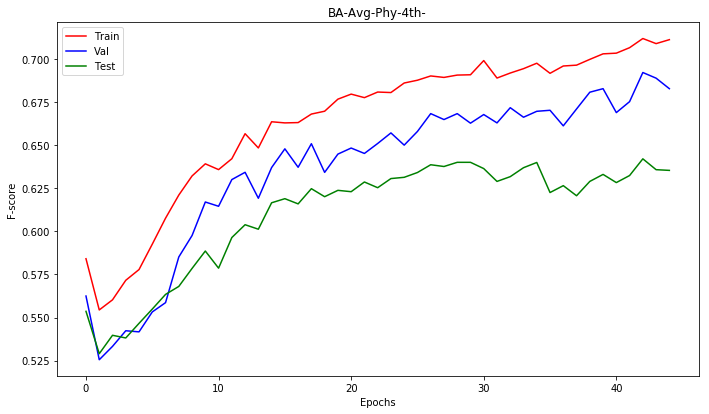

  1%|          | 7/839 [00:00<00:12, 64.88it/s]

==========Epoch42========
TRAIN: (0.7174855868987087, 0.7246722288438617, 0.7118298945273382)
VAL: (0.7098578185826507, 0.7111111111111111, 0.6921165240289663)
TEST: (0.6520800605079868, 0.6658195679796697, 0.6420516429185119)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674847     0.742091    0.704698    0.713098    0.595506   
Recall       0.477742     0.867168    0.432099    0.886305    0.356902   
F-score      0.559441     0.799769    0.535714    0.790323    0.446316   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.686371  
Recall       0.853061  
F-score      0.760692  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.65it/s]


==========Epoch No:45==========
Training Loss: 465.514493987
Train: (0.7157440928940797, 0.723083035359555, 0.7099006390359796, None)
                    0            1
Precision    0.672840     0.740503
Recall       0.473398     0.867168
F-score      0.555768     0.798846
Count      921.000000  1596.000000
--------
Val: (0.7053387713109935, 0.7063492063492064, 0.6854395238475796, None)
                    0           1
Precision    0.701389    0.707819
Recall       0.415638    0.888889
F-score      0.521964    0.788087
Count      243.000000  387.000000
--------
Test: (0.6537160226225179, 0.6670902160101652, 0.642493713890119, None)
                    0           1
Precision    0.600000    0.686275
Recall       0.353535    0.857143
F-score      0.444915    0.762250
Count      297.000000  490.000000




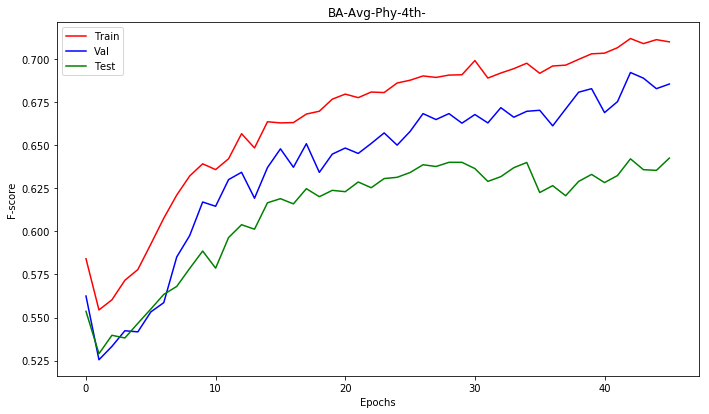

  1%|          | 7/839 [00:00<00:12, 67.99it/s]

==========Epoch42========
TRAIN: (0.7174855868987087, 0.7246722288438617, 0.7118298945273382)
VAL: (0.7098578185826507, 0.7111111111111111, 0.6921165240289663)
TEST: (0.6520800605079868, 0.6658195679796697, 0.6420516429185119)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674847     0.742091    0.704698    0.713098    0.595506   
Recall       0.477742     0.867168    0.432099    0.886305    0.356902   
F-score      0.559441     0.799769    0.535714    0.790323    0.446316   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.686371  
Recall       0.853061  
F-score      0.760692  
Count      490.000000  


100%|██████████| 839/839 [00:15<00:00, 55.61it/s]


==========Epoch No:46==========
Training Loss: 466.521019936
Train: (0.7170506547446189, 0.724274930472785, 0.7113480949701579, None)
                    0            1
Precision    0.674347     0.741693
Recall       0.476656     0.867168
F-score      0.558524     0.799538
Count      921.000000  1596.000000
--------
Val: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996, None)
                    0           1
Precision    0.727891    0.718427
Recall       0.440329    0.896641
F-score      0.548718    0.797701
Count      243.000000  387.000000
--------
Test: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151, None)
                    0           1
Precision    0.596685    0.688119
Recall       0.363636    0.851020
F-score      0.451883    0.760949
Count      297.000000  490.000000




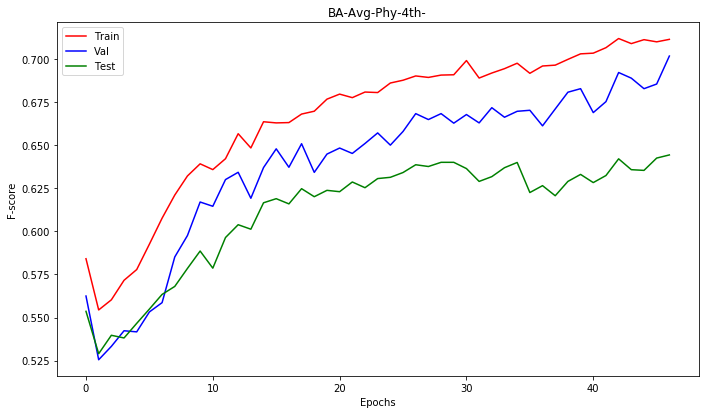

  1%|          | 6/839 [00:00<00:15, 52.59it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 56.46it/s]


==========Epoch No:47==========
Training Loss: 464.131797165
Train: (0.7197122195401725, 0.7262614223281685, 0.7121543983669718, None)
                    0            1
Precision    0.683544     0.740584
Recall       0.469055     0.874687
F-score      0.556343     0.802068
Count      921.000000  1596.000000
--------
Val: (0.7185422740524782, 0.7158730158730159, 0.6943527173143327, None)
                    0           1
Precision    0.728571    0.712245
Recall       0.419753    0.901809
F-score      0.532637    0.795895
Count      243.000000  387.000000
--------
Test: (0.6524432382619011, 0.6658195679796697, 0.6382454092009325, None)
                    0           1
Precision    0.602410    0.682770
Recall       0.336700    0.865306
F-score      0.431965    0.763276
Count      297.000000  490.000000




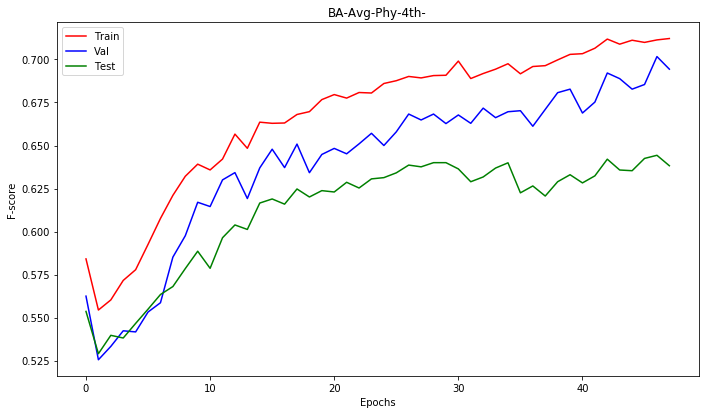

  1%|          | 7/839 [00:00<00:12, 65.13it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 61.08it/s]


==========Epoch No:48==========
Training Loss: 463.843347102
Train: (0.7152186367151182, 0.7226857369884784, 0.7098169424505528, None)
                    0            1
Precision    0.670750     0.740880
Recall       0.475570     0.865288
F-score      0.556544     0.798266
Count      921.000000  1596.000000
--------
Val: (0.7153809523809525, 0.7158730158730159, 0.6974935820758479, None)
                    0           1
Precision    0.713333    0.716667
Recall       0.440329    0.888889
F-score      0.544529    0.793541
Count      243.000000  387.000000
--------
Test: (0.6553359890880233, 0.6683608640406608, 0.6435488767824639, None)
                    0           1
Precision    0.603448    0.686786
Recall       0.353535    0.859184
F-score      0.445860    0.763373
Count      297.000000  490.000000




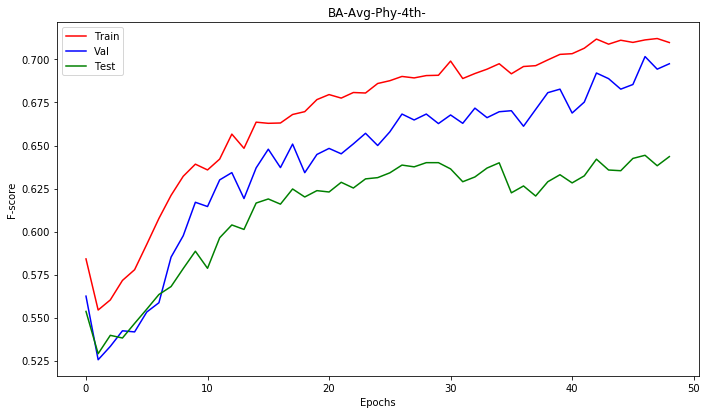

  1%|          | 7/839 [00:00<00:13, 62.93it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.74it/s]


==========Epoch No:49==========
Training Loss: 464.462363824
Train: (0.7217897971812984, 0.7286452125546286, 0.7167556996417163, None)
                    0            1
Precision    0.679217     0.746357
Recall       0.489685     0.866541
F-score      0.569085     0.801972
Count      921.000000  1596.000000
--------
Val: (0.7115297619047618, 0.7126984126984127, 0.6941136220990417, None)
                    0           1
Precision    0.706667    0.714583
Recall       0.436214    0.886305
F-score      0.539440    0.791234
Count      243.000000  387.000000
--------
Test: (0.6554117377703429, 0.6683608640406608, 0.6429237529168028, None)
                    0           1
Precision    0.604651    0.686179
Recall       0.350168    0.861224
F-score      0.443497    0.763801
Count      297.000000  490.000000




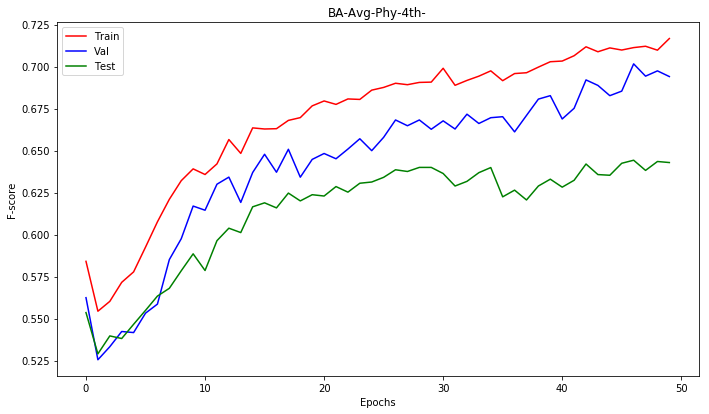

  1%|          | 6/839 [00:00<00:16, 51.56it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.19it/s]


==========Epoch No:50==========
Training Loss: 462.851233289
Train: (0.7189649560093333, 0.7258641239570918, 0.7126150773554607, None)
                    0            1
Precision    0.679070     0.741987
Recall       0.475570     0.870301
F-score      0.559387     0.801038
Count      921.000000  1596.000000
--------
Val: (0.7098578185826507, 0.7111111111111111, 0.6921165240289663, None)
                    0           1
Precision    0.704698    0.713098
Recall       0.432099    0.886305
F-score      0.535714    0.790323
Count      243.000000  387.000000
--------
Test: (0.6555006194545431, 0.6683608640406608, 0.6422900271328625, None)
                    0           1
Precision    0.605882    0.685575
Recall       0.346801    0.863265
F-score      0.441113    0.764228
Count      297.000000  490.000000




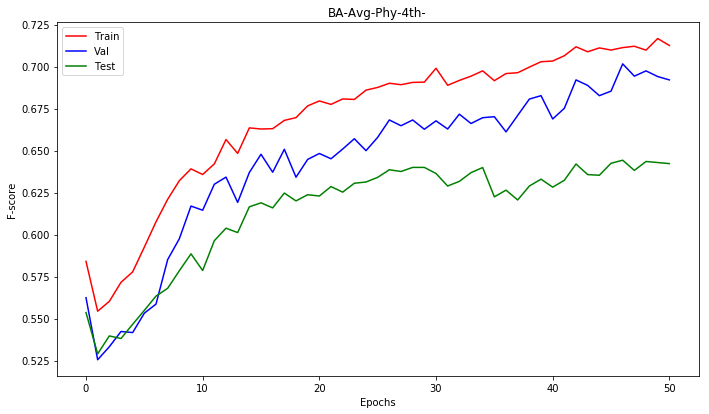

  1%|          | 6/839 [00:00<00:14, 58.85it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.58it/s]


==========Epoch No:51==========
Training Loss: 461.539590269
Train: (0.7219540139798855, 0.7286452125546286, 0.7161175936888153, None)
                    0            1
Precision    0.681957     0.745035
Recall       0.484256     0.869674
F-score      0.566349     0.802544
Count      921.000000  1596.000000
--------
Val: (0.7198212883897531, 0.719047619047619, 0.7002735811891176, None)
                    0           1
Precision    0.722973    0.717842
Recall       0.440329    0.894057
F-score      0.547315    0.796318
Count      243.000000  387.000000
--------
Test: (0.6588551602004769, 0.6709021601016518, 0.6443936014394888, None)
                    0           1
Precision    0.613095    0.686591
Recall       0.346801    0.867347
F-score      0.443011    0.766456
Count      297.000000  490.000000




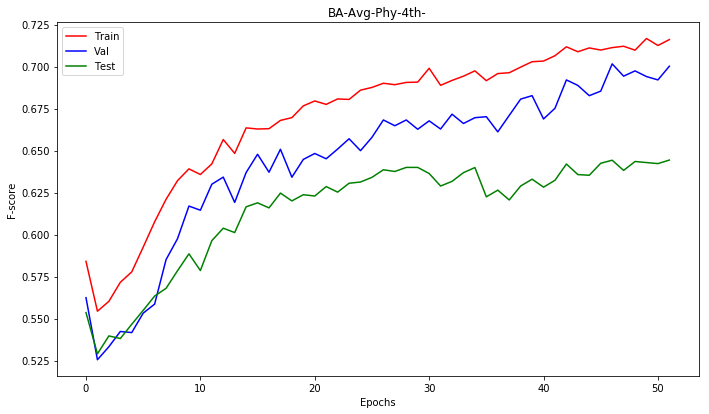

  1%|          | 7/839 [00:00<00:12, 64.67it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.72it/s]


==========Epoch No:52==========
Training Loss: 460.978967756
Train: (0.7202638165344571, 0.7270560190703218, 0.7140627532535408, None)
                    0            1
Precision    0.680556     0.743178
Recall       0.478827     0.870301
F-score      0.562141     0.801732
Count      921.000000  1596.000000
--------
Val: (0.7131954580557492, 0.7142857142857143, 0.6961047182498279, None)
                    0           1
Precision    0.708609    0.716075
Recall       0.440329    0.886305
F-score      0.543147    0.792148
Count      243.000000  387.000000
--------
Test: (0.6600636629069248, 0.6721728081321474, 0.6479518251284377, None)
                    0           1
Precision    0.611429    0.689542
Recall       0.360269    0.861224
F-score      0.453390    0.765880
Count      297.000000  490.000000




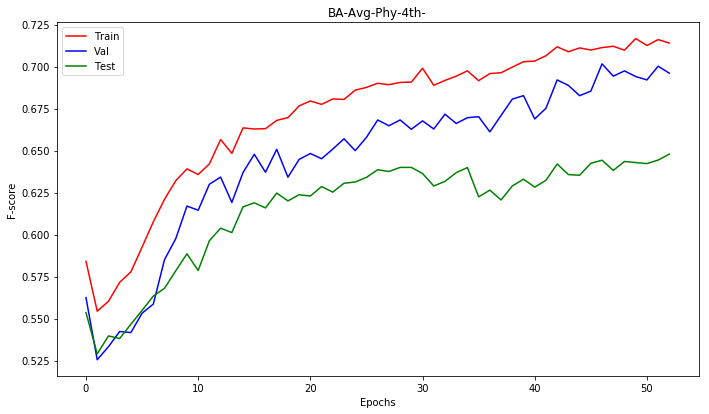

  0%|          | 4/839 [00:00<00:23, 35.41it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.45it/s]


==========Epoch No:53==========
Training Loss: 459.755678579
Train: (0.722315237280336, 0.7290425109257052, 0.7168536640516342, None)
                    0            1
Precision    0.681335     0.745963
Recall       0.487514     0.868421
F-score      0.568354     0.802548
Count      921.000000  1596.000000
--------
Val: (0.7170322909404052, 0.7174603174603175, 0.6994813324914965, None)
                    0           1
Precision    0.715232    0.718163
Recall       0.444444    0.888889
F-score      0.548223    0.794457
Count      243.000000  387.000000
--------
Test: (0.6538456861803348, 0.6670902160101652, 0.6412386529398737, None)
                    0           1
Precision    0.602339    0.685065
Recall       0.346801    0.861224
F-score      0.440171    0.763110
Count      297.000000  490.000000




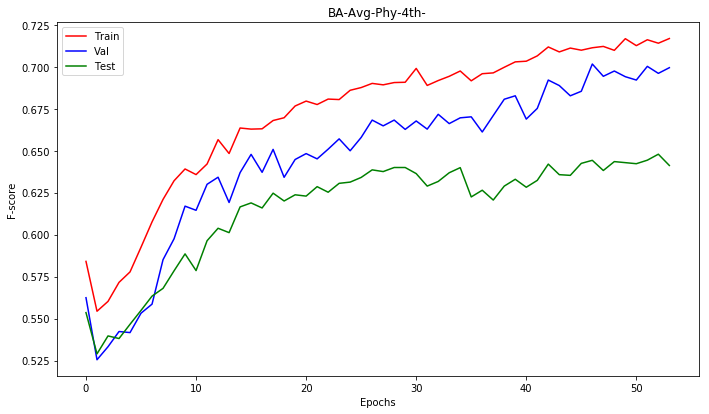

  1%|          | 7/839 [00:00<00:12, 66.00it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.07it/s]


==========Epoch No:54==========
Training Loss: 459.557257757
Train: (0.7260695344030089, 0.7322208978943187, 0.7196665936741881, None)
                    0            1
Precision    0.689708     0.747053
Recall       0.487514     0.873434
F-score      0.571247     0.805315
Count      921.000000  1596.000000
--------
Val: (0.7170322909404052, 0.7174603174603175, 0.6994813324914965, None)
                    0           1
Precision    0.715232    0.718163
Recall       0.444444    0.888889
F-score      0.548223    0.794457
Count      243.000000  387.000000
--------
Test: (0.6570633439321998, 0.6696315120711563, 0.6439772891769739, None)
                    0           1
Precision    0.608187    0.686688
Recall       0.350168    0.863265
F-score      0.444444    0.764919
Count      297.000000  490.000000




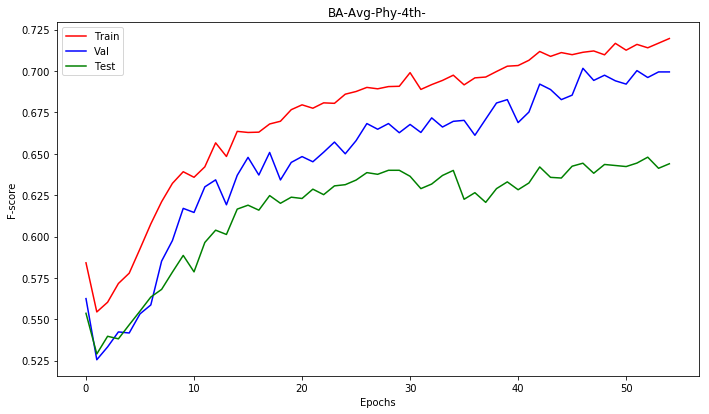

  1%|          | 7/839 [00:00<00:12, 66.81it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.42it/s]


==========Epoch No:55==========
Training Loss: 459.200099736
Train: (0.7261636064571557, 0.7322208978943187, 0.7194088415620816, None)
                    0            1
Precision    0.690881     0.746524
Recall       0.485342     0.874687
F-score      0.570153     0.805540
Count      921.000000  1596.000000
--------
Val: (0.7165353948666526, 0.7158730158730159, 0.69626952106329, None)
                    0           1
Precision    0.719178    0.714876
Recall       0.432099    0.894057
F-score      0.539846    0.794489
Count      243.000000  387.000000
--------
Test: (0.6555006194545431, 0.6683608640406608, 0.6422900271328625, None)
                    0           1
Precision    0.605882    0.685575
Recall       0.346801    0.863265
F-score      0.441113    0.764228
Count      297.000000  490.000000




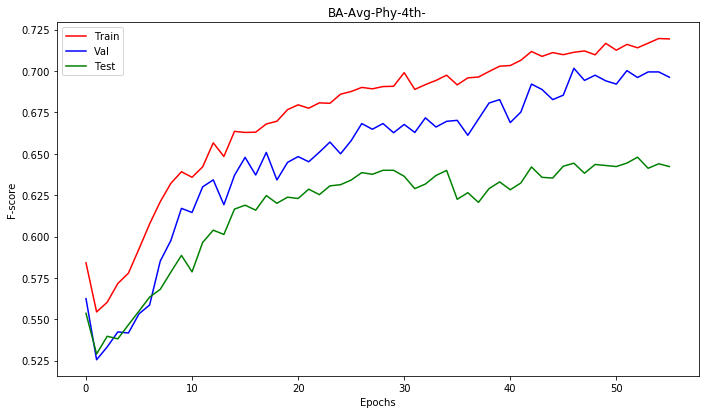

  1%|          | 7/839 [00:00<00:12, 64.70it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.80it/s]


==========Epoch No:56==========
Training Loss: 458.563171297
Train: (0.7247385665898407, 0.7310290027810886, 0.718354316932706, None)
                    0            1
Precision    0.687692     0.746117
Recall       0.485342     0.872807
F-score      0.569064     0.804505
Count      921.000000  1596.000000
--------
Val: (0.7070296074348688, 0.707936507936508, 0.6874640256178135, None)
                    0           1
Precision    0.703448    0.709278
Recall       0.419753    0.888889
F-score      0.525773    0.788991
Count      243.000000  387.000000
--------
Test: (0.6506280284284698, 0.6645489199491741, 0.6385000167027735, None)
                    0           1
Precision    0.596491    0.683442
Recall       0.343434    0.859184
F-score      0.435897    0.761302
Count      297.000000  490.000000




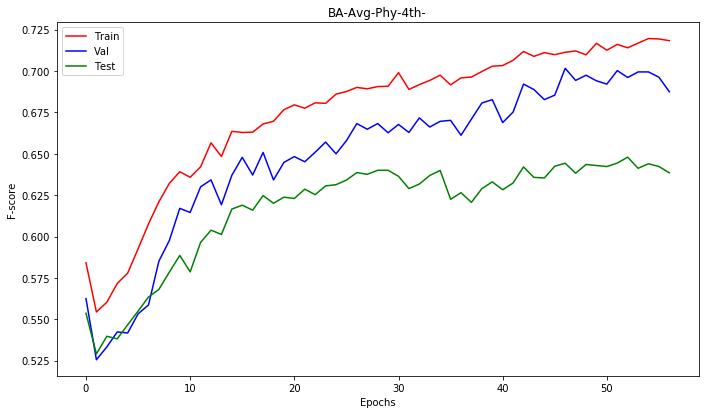

  0%|          | 4/839 [00:00<00:25, 33.18it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.72it/s]


==========Epoch No:57==========
Training Loss: 457.147562519
Train: (0.7276148920780391, 0.7338100913786253, 0.7220849344352998, None)
                    0            1
Precision    0.689291     0.749730
Recall       0.496200     0.870927
F-score      0.577020     0.805797
Count      921.000000  1596.000000
--------
Val: (0.7081794005030521, 0.7095238095238096, 0.6901133636023078, None)
                    0           1
Precision    0.702703    0.711618
Recall       0.427984    0.886305
F-score      0.531969    0.789413
Count      243.000000  387.000000
--------
Test: (0.6489465683144885, 0.6632782719186785, 0.638712087925419, None)
                    0           1
Precision    0.590909    0.684124
Recall       0.350168    0.853061
F-score      0.439746    0.759310
Count      297.000000  490.000000




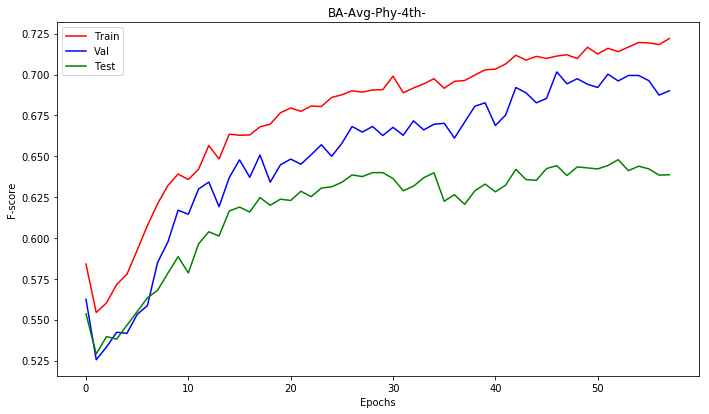

  1%|          | 6/839 [00:00<00:14, 57.96it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.52it/s]


==========Epoch No:58==========
Training Loss: 456.102897689
Train: (0.7269714223688478, 0.733015494636472, 0.7204984435445911, None)
                    0            1
Precision    0.691244     0.747588
Recall       0.488599     0.874060
F-score      0.572519     0.805893
Count      921.000000  1596.000000
--------
Val: (0.7170322909404052, 0.7174603174603175, 0.6994813324914965, None)
                    0           1
Precision    0.715232    0.718163
Recall       0.444444    0.888889
F-score      0.548223    0.794457
Count      243.000000  387.000000
--------
Test: (0.6505033976104643, 0.6645489199491741, 0.6409950486329054, None)
                    0           1
Precision    0.592179    0.685855
Recall       0.356902    0.851020
F-score      0.445378    0.759563
Count      297.000000  490.000000




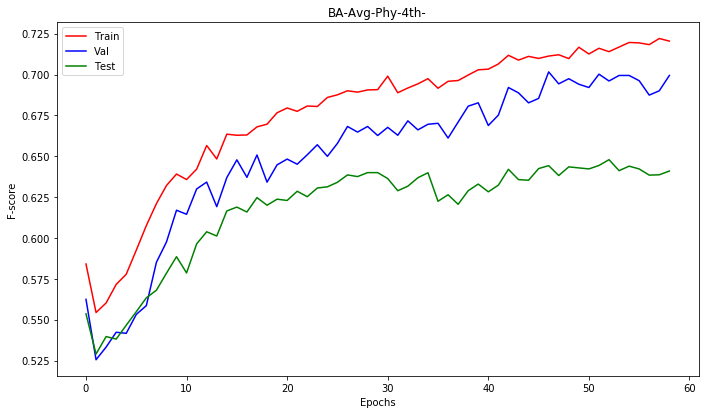

  1%|          | 8/839 [00:00<00:11, 72.84it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.55it/s]


==========Epoch No:59==========
Training Loss: 455.802472606
Train: (0.7283978931039012, 0.7346046881207787, 0.7232829460999762, None)
                    0            1
Precision    0.689088     0.751082
Recall       0.500543     0.869674
F-score      0.579874     0.806039
Count      921.000000  1596.000000
--------
Val: (0.7153809523809525, 0.7158730158730159, 0.6974935820758479, None)
                    0           1
Precision    0.713333    0.716667
Recall       0.440329    0.888889
F-score      0.544529    0.793541
Count      243.000000  387.000000
--------
Test: (0.6489396264252925, 0.6632782719186785, 0.6399386567732953, None)
                    0           1
Precision    0.588889    0.685338
Recall       0.356902    0.848980
F-score      0.444444    0.758432
Count      297.000000  490.000000




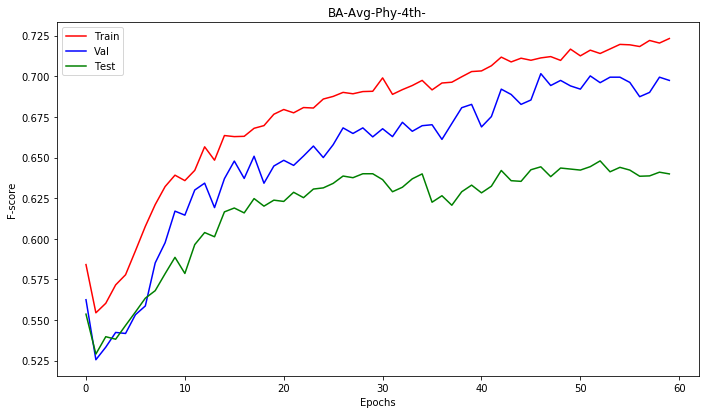

  1%|          | 7/839 [00:00<00:12, 66.95it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 56.82it/s]


==========Epoch No:60==========
Training Loss: 454.844645619
Train: (0.7251628796278163, 0.7318235995232419, 0.7209319337241203, None)
                    0            1
Precision    0.681416     0.750408
Recall       0.501629     0.864662
F-score      0.577861     0.803493
Count      921.000000  1596.000000
--------
Val: (0.7148551294554378, 0.7158730158730159, 0.6980898723724508, None)
                    0           1
Precision    0.710526    0.717573
Recall       0.444444    0.886305
F-score      0.546835    0.793064
Count      243.000000  387.000000
--------
Test: (0.6505009181690666, 0.6645489199491741, 0.6415976240360366, None)
                    0           1
Precision    0.591160    0.686469
Recall       0.360269    0.848980
F-score      0.447699    0.759124
Count      297.000000  490.000000




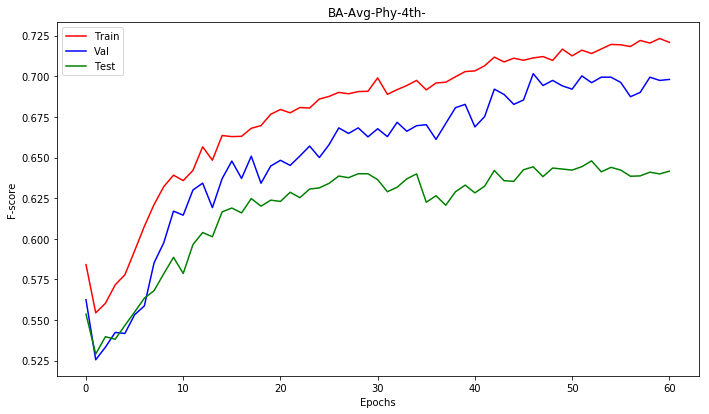

  1%|          | 6/839 [00:00<00:14, 56.46it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.31it/s]


==========Epoch No:61==========
Training Loss: 453.888578743
Train: (0.7290764713153421, 0.735399284862932, 0.7249487079897007, None)
                    0            1
Precision    0.686676     0.753544
Recall       0.509229     0.865915
F-score      0.584788     0.805831
Count      921.000000  1596.000000
--------
Val: (0.7148551294554378, 0.7158730158730159, 0.6980898723724508, None)
                    0           1
Precision    0.710526    0.717573
Recall       0.444444    0.886305
F-score      0.546835    0.793064
Count      243.000000  387.000000
--------
Test: (0.6536026585375009, 0.6670902160101652, 0.6454841974726825, None)
                    0           1
Precision    0.594595    0.689369
Recall       0.370370    0.846939
F-score      0.456432    0.760073
Count      297.000000  490.000000




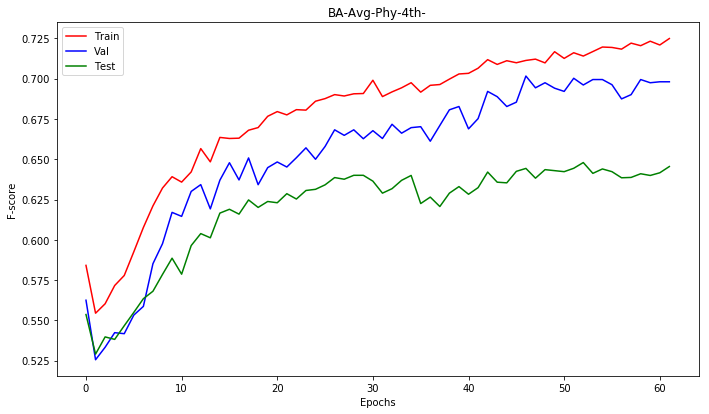

  1%|          | 6/839 [00:00<00:15, 54.28it/s]

==========Epoch46========
TRAIN: (0.7170506547446189, 0.724274930472785, 0.7113480949701579)
VAL: (0.7220771538429037, 0.7206349206349206, 0.7016647720095996)
TEST: (0.6536133258386808, 0.6670902160101652, 0.6443127935509151)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.674347     0.741693    0.727891    0.718427    0.596685   
Recall       0.476656     0.867168    0.440329    0.896641    0.363636   
F-score      0.558524     0.799538    0.548718    0.797701    0.451883   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.688119  
Recall       0.851020  
F-score      0.760949  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.87it/s]


==========Epoch No:62==========
Training Loss: 453.121096879
Train: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858, None)
                    0            1
Precision    0.694118     0.755580
Recall       0.512486     0.869674
F-score      0.589631     0.808622
Count      921.000000  1596.000000
--------
Val: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602, None)
                    0           1
Precision    0.726667    0.720833
Recall       0.448560    0.894057
F-score      0.554707    0.798155
Count      243.000000  387.000000
--------
Test: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392, None)
                    0           1
Precision    0.598901    0.689256
Recall       0.367003    0.851020
F-score      0.455115    0.761644
Count      297.000000  490.000000




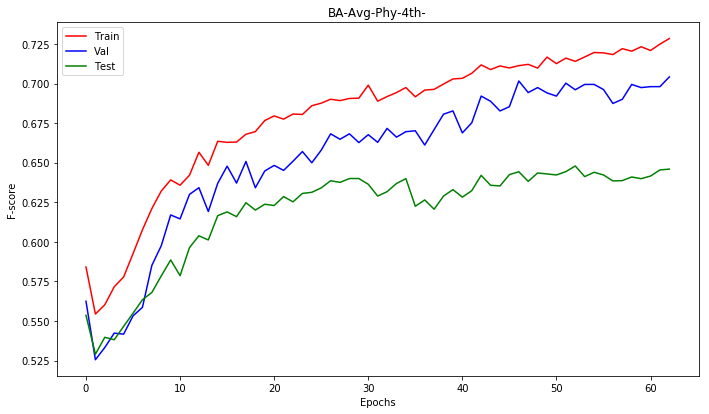

  1%|          | 8/839 [00:00<00:11, 74.41it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.44it/s]


==========Epoch No:63==========
Training Loss: 452.807609975
Train: (0.7313234779826869, 0.7373857767183154, 0.7268378859220608, None)
                    0            1
Precision    0.691176     0.754491
Recall       0.510315     0.868421
F-score      0.587133     0.807457
Count      921.000000  1596.000000
--------
Val: (0.7204464588960231, 0.719047619047619, 0.6996631576994543, None)
                    0           1
Precision    0.726027    0.716942
Recall       0.436214    0.896641
F-score      0.544987    0.796785
Count      243.000000  387.000000
--------
Test: (0.6536026585375009, 0.6670902160101652, 0.6454841974726825, None)
                    0           1
Precision    0.594595    0.689369
Recall       0.370370    0.846939
F-score      0.456432    0.760073
Count      297.000000  490.000000




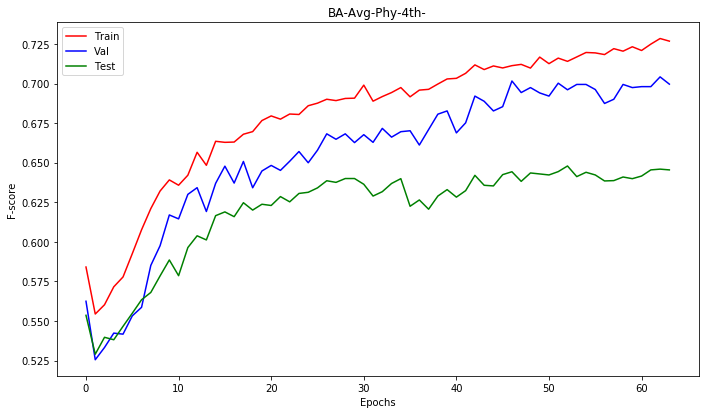

  1%|          | 8/839 [00:00<00:11, 72.62it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.96it/s]


==========Epoch No:64==========
Training Loss: 451.932802722
Train: (0.7303155335323994, 0.7365911799761621, 0.726594217755701, None)
                    0            1
Precision    0.686957     0.755337
Recall       0.514658     0.864662
F-score      0.588454     0.806310
Count      921.000000  1596.000000
--------
Val: (0.718157262905162, 0.719047619047619, 0.7020425914104167, None)
                    0           1
Precision    0.714286    0.720588
Recall       0.452675    0.886305
F-score      0.554156    0.794902
Count      243.000000  387.000000
--------
Test: (0.6520551182674321, 0.6658195679796697, 0.6432522504094651, None)
                    0           1
Precision    0.593407    0.687603
Recall       0.363636    0.848980
F-score      0.450939    0.759817
Count      297.000000  490.000000




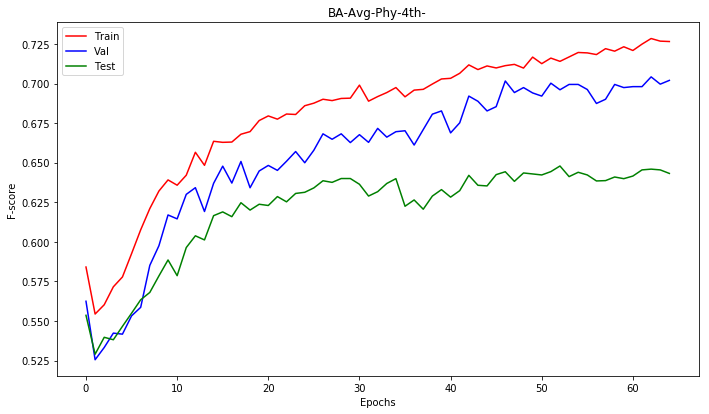

  1%|          | 6/839 [00:00<00:15, 55.52it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.71it/s]


==========Epoch No:65==========
Training Loss: 451.659150198
Train: (0.7318822889852128, 0.7377830750893921, 0.7268367751966736, None)
                    0            1
Precision    0.693908     0.753796
Recall       0.507058     0.870927
F-score      0.585947     0.808140
Count      921.000000  1596.000000
--------
Val: (0.7214551818578664, 0.7206349206349206, 0.7022665287313081, None)
                    0           1
Precision    0.724832    0.719335
Recall       0.444444    0.894057
F-score      0.551020    0.797235
Count      243.000000  387.000000
--------
Test: (0.6582264290392685, 0.6709021601016518, 0.649257056773527, None)
                    0           1
Precision    0.603261    0.691542
Recall       0.373737    0.851020
F-score      0.461538    0.763038
Count      297.000000  490.000000




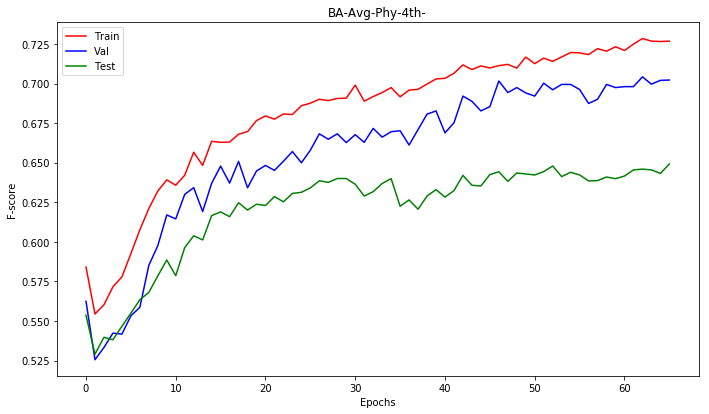

  1%|          | 5/839 [00:00<00:17, 46.40it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.74it/s]


==========Epoch No:66==========
Training Loss: 451.336570442
Train: (0.7312665353472746, 0.7373857767183154, 0.7270719719475728, None)
                    0            1
Precision    0.690058     0.755046
Recall       0.512486     0.867168
F-score      0.588162     0.807232
Count      921.000000  1596.000000
--------
Val: (0.7084550084889644, 0.7111111111111111, 0.6939197145821916, None)
                    0           1
Precision    0.696774    0.715789
Recall       0.444444    0.878553
F-score      0.542714    0.788863
Count      243.000000  387.000000
--------
Test: (0.6582264290392685, 0.6709021601016518, 0.649257056773527, None)
                    0           1
Precision    0.603261    0.691542
Recall       0.373737    0.851020
F-score      0.461538    0.763038
Count      297.000000  490.000000




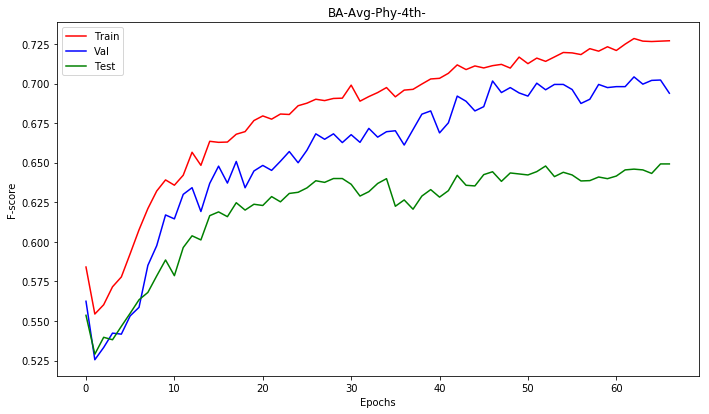

  1%|          | 6/839 [00:00<00:15, 53.90it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.52it/s]


==========Epoch No:67==========
Training Loss: 450.063637927
Train: (0.7319727283827625, 0.7381803734604688, 0.7288094329843288, None)
                    0            1
Precision    0.687143     0.757843
Recall       0.522258     0.862782
F-score      0.593461     0.806915
Count      921.000000  1596.000000
--------
Val: (0.7127001744093864, 0.7142857142857143, 0.6966991341991342, None)
                    0           1
Precision    0.705882    0.716981
Recall       0.444444    0.883721
F-score      0.545455    0.791667
Count      243.000000  387.000000
--------
Test: (0.6566696564267384, 0.6696315120711563, 0.6487596080172698, None)
                    0           1
Precision    0.598930    0.691667
Recall       0.377104    0.846939
F-score      0.462810    0.761468
Count      297.000000  490.000000




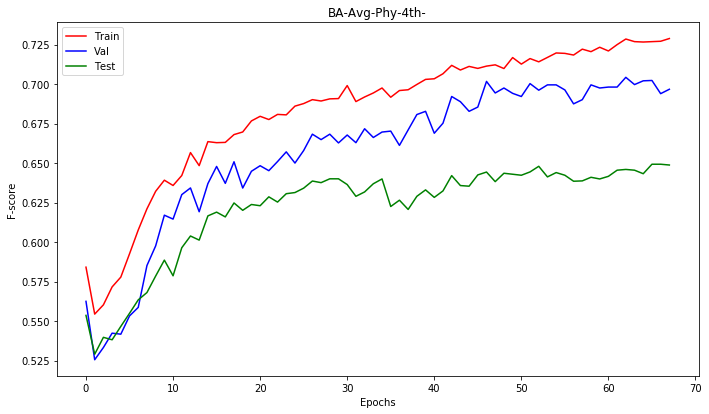

  1%|          | 7/839 [00:00<00:12, 67.49it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.75it/s]


==========Epoch No:68==========
Training Loss: 450.410759702
Train: (0.7342029790534945, 0.7401668653158522, 0.7305879937978559, None)
                    0            1
Precision    0.692086     0.758507
Recall       0.522258     0.865915
F-score      0.595297     0.808660
Count      921.000000  1596.000000
--------
Val: (0.7076785714285714, 0.7095238095238096, 0.6907336621222355, None)
                    0           1
Precision    0.700000    0.712500
Recall       0.432099    0.883721
F-score      0.534351    0.788927
Count      243.000000  387.000000
--------
Test: (0.6520593792725414, 0.6658195679796697, 0.6438401773414578, None)
                    0           1
Precision    0.592391    0.688226
Recall       0.367003    0.846939
F-score      0.453222    0.759378
Count      297.000000  490.000000




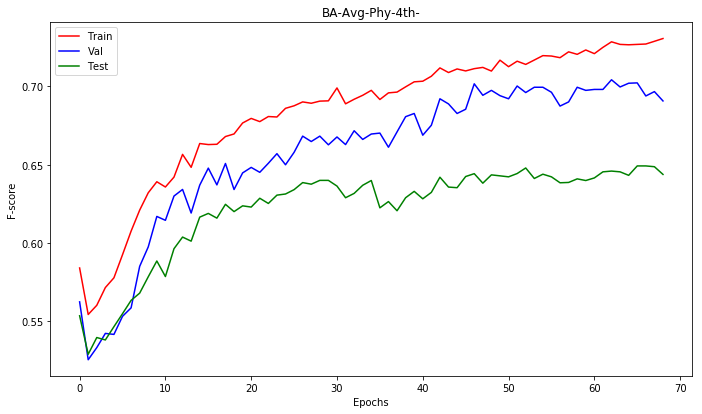

  1%|          | 7/839 [00:00<00:12, 66.37it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.12it/s]


==========Epoch No:69==========
Training Loss: 449.173356399
Train: (0.729909286335345, 0.7361938816050854, 0.7260081740840021, None)
                    0            1
Precision    0.687045     0.754645
Recall       0.512486     0.865288
F-score      0.587065     0.806188
Count      921.000000  1596.000000
--------
Val: (0.7016849594017812, 0.7047619047619048, 0.6859748755248221, None)
                    0           1
Precision    0.688742    0.709812
Recall       0.427984    0.878553
F-score      0.527919    0.785219
Count      243.000000  387.000000
--------
Test: (0.6398148295284936, 0.6556543837357052, 0.6336038432221824, None)
                    0           1
Precision    0.569892    0.682196
Recall       0.356902    0.836735
F-score      0.438923    0.751604
Count      297.000000  490.000000




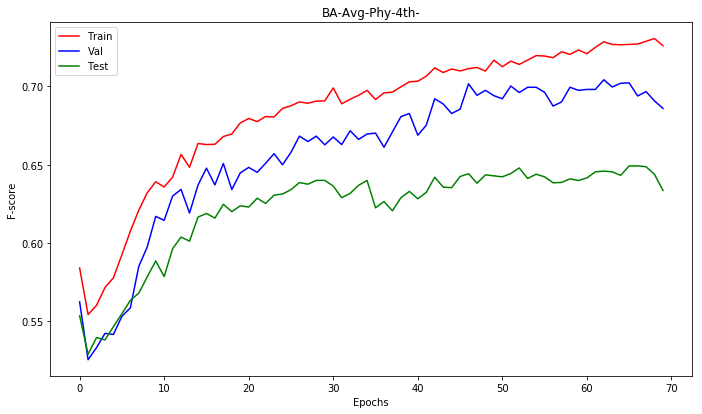

  1%|          | 6/839 [00:00<00:14, 58.02it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.26it/s]


==========Epoch No:70==========
Training Loss: 448.988397554
Train: (0.7272919552645555, 0.7338100913786253, 0.7234148252322097, None)
                    0            1
Precision    0.683212     0.752729
Recall       0.508143     0.864035
F-score      0.582814     0.804551
Count      921.000000  1596.000000
--------
Val: (0.6999761904761905, 0.7031746031746032, 0.6839737421686232, None)
                    0           1
Precision    0.686667    0.708333
Recall       0.423868    0.878553
F-score      0.524173    0.784314
Count      243.000000  387.000000
--------
Test: (0.6461583918828014, 0.6607369758576874, 0.6407289843290097, None)
                    0           1
Precision    0.578125    0.687395
Recall       0.373737    0.834694
F-score      0.453988    0.753917
Count      297.000000  490.000000




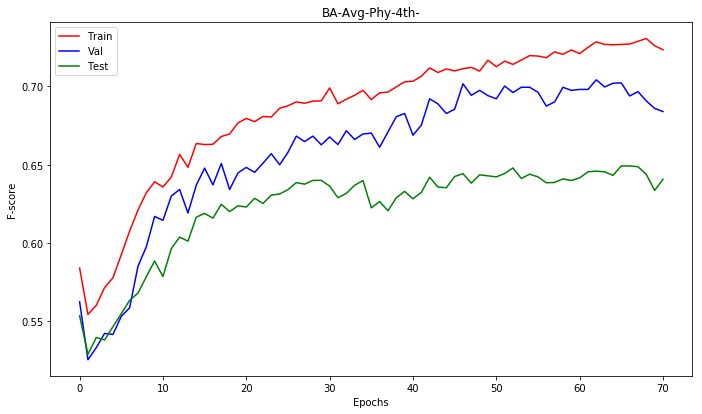

  1%|          | 6/839 [00:00<00:19, 41.72it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 63.69it/s]


==========Epoch No:71==========
Training Loss: 449.116865799
Train: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858, None)
                    0            1
Precision    0.694118     0.755580
Recall       0.512486     0.869674
F-score      0.589631     0.808622
Count      921.000000  1596.000000
--------
Val: (0.7033869978293013, 0.7063492063492064, 0.6879699798262761, None)
                    0           1
Precision    0.690789    0.711297
Recall       0.432099    0.878553
F-score      0.531646    0.786127
Count      243.000000  387.000000
--------
Test: (0.6413060440837397, 0.6569250317662008, 0.6346592874718484, None)
                    0           1
Precision    0.572973    0.682724
Recall       0.356902    0.838776
F-score      0.439834    0.752747
Count      297.000000  490.000000




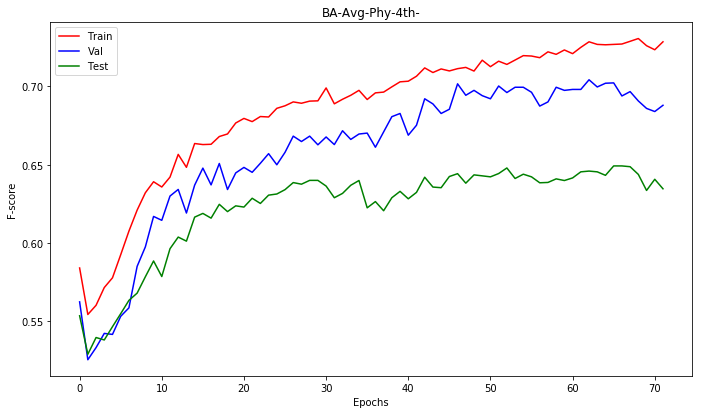

  1%|          | 7/839 [00:00<00:12, 68.08it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:12<00:00, 66.73it/s]


==========Epoch No:72==========
Training Loss: 447.917268381
Train: (0.7311929057322749, 0.7373857767183154, 0.727418971246634, None)
                    0            1
Precision    0.688406     0.755884
Recall       0.515744     0.865288
F-score      0.589696     0.806895
Count      921.000000  1596.000000
--------
Val: (0.7025954003802104, 0.7063492063492064, 0.6891706618462534, None)
                    0           1
Precision    0.685897    0.713080
Recall       0.440329    0.873385
F-score      0.536341    0.785134
Count      243.000000  387.000000
--------
Test: (0.6428797367887831, 0.6581956797966964, 0.6363078738995094, None)
                    0           1
Precision    0.575269    0.683860
Recall       0.360269    0.838776
F-score      0.443064    0.753437
Count      297.000000  490.000000




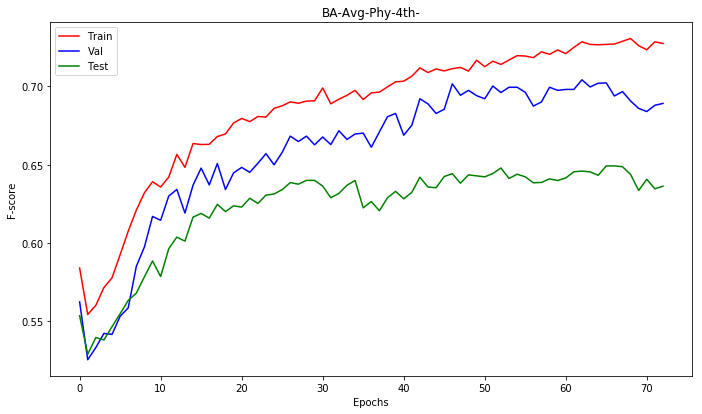

  1%|          | 7/839 [00:00<00:12, 68.27it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.33it/s]


==========Epoch No:73==========
Training Loss: 446.594230741
Train: (0.7338514926225547, 0.7397695669447756, 0.7297791587320496, None)
                    0            1
Precision    0.693314     0.757244
Recall       0.517915     0.867794
F-score      0.592915     0.808759
Count      921.000000  1596.000000
--------
Val: (0.6988269114851393, 0.7031746031746032, 0.6858103446770235, None)
                    0           1
Precision    0.679487    0.710970
Recall       0.436214    0.870801
F-score      0.531328    0.782811
Count      243.000000  387.000000
--------
Test: (0.6384463003986787, 0.6543837357052097, 0.6331356769730341, None)
                    0           1
Precision    0.566138    0.682274
Recall       0.360269    0.832653
F-score      0.440329    0.750000
Count      297.000000  490.000000




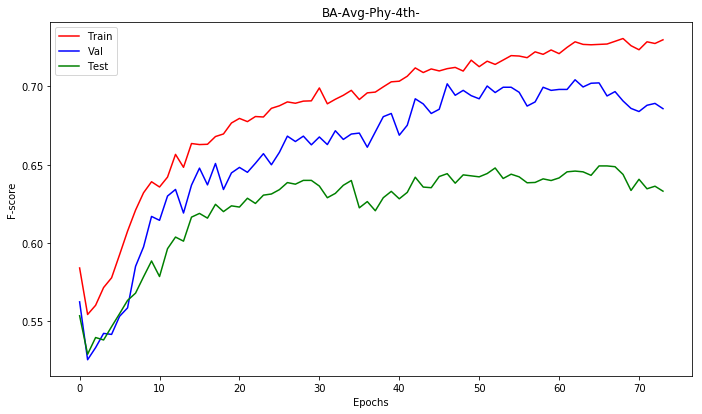

  1%|          | 6/839 [00:00<00:14, 56.48it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.14it/s]


==========Epoch No:74==========
Training Loss: 446.190763965
Train: (0.73277077199702, 0.7389749702026222, 0.7302916085665694, None)
                    0            1
Precision    0.685393     0.760111
Recall       0.529859     0.859649
F-score      0.597673     0.806822
Count      921.000000  1596.000000
--------
Val: (0.70191679331307, 0.7063492063492064, 0.6903296951477026, None)
                    0           1
Precision    0.681250    0.714894
Recall       0.448560    0.868217
F-score      0.540943    0.784131
Count      243.000000  387.000000
--------
Test: (0.6375643683541765, 0.6531130876747141, 0.6343381148482111, None)
                    0           1
Precision    0.560606    0.684211
Recall       0.373737    0.822449
F-score      0.448485    0.746988
Count      297.000000  490.000000




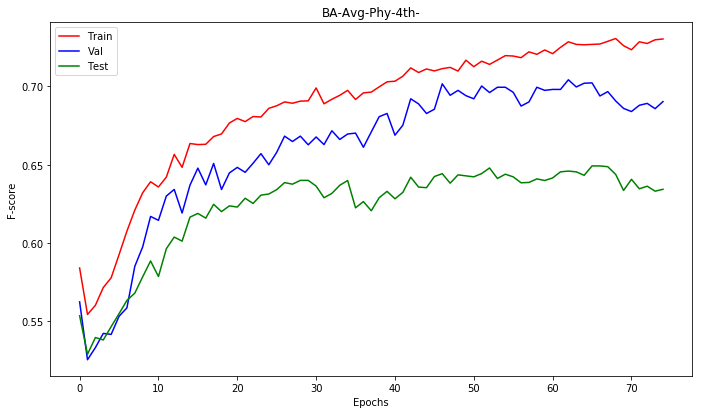

  1%|          | 8/839 [00:00<00:11, 72.86it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 56.83it/s]


==========Epoch No:75==========
Training Loss: 445.389136523
Train: (0.7345240268470825, 0.7405641636869289, 0.7317174018791299, None)
                    0            1
Precision    0.689266     0.760641
Recall       0.529859     0.862155
F-score      0.599141     0.808223
Count      921.000000  1596.000000
--------
Val: (0.7013447533310404, 0.7063492063492064, 0.6914480595606035, None)
                    0           1
Precision    0.676829    0.716738
Recall       0.456790    0.863049
F-score      0.545455    0.783118
Count      243.000000  387.000000
--------
Test: (0.6391221248129679, 0.6543837357052097, 0.6359500236616276, None)
                    0           1
Precision    0.562814    0.685374
Recall       0.377104    0.822449
F-score      0.451613    0.747681
Count      297.000000  490.000000




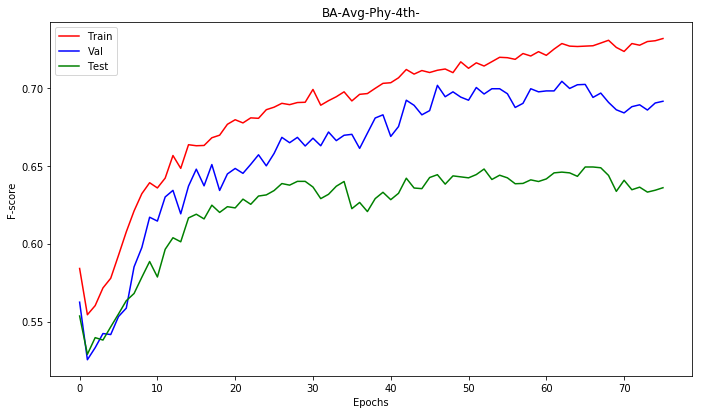

  1%|          | 5/839 [00:00<00:19, 42.27it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.28it/s]


==========Epoch No:76==========
Training Loss: 445.410153538
Train: (0.7354804585693523, 0.7413587604290822, 0.7319908783354893, None)
                    0            1
Precision    0.693410     0.759758
Recall       0.525516     0.865915
F-score      0.597900     0.809370
Count      921.000000  1596.000000
--------
Val: (0.7002111696739746, 0.7047619047619048, 0.6883683480698406, None)
                    0           1
Precision    0.679245    0.713376
Recall       0.444444    0.868217
F-score      0.537313    0.783217
Count      243.000000  387.000000
--------
Test: (0.6447002897944693, 0.6594663278271918, 0.6396636241859658, None)
                    0           1
Precision    0.575130    0.686869
Recall       0.373737    0.832653
F-score      0.453061    0.752768
Count      297.000000  490.000000




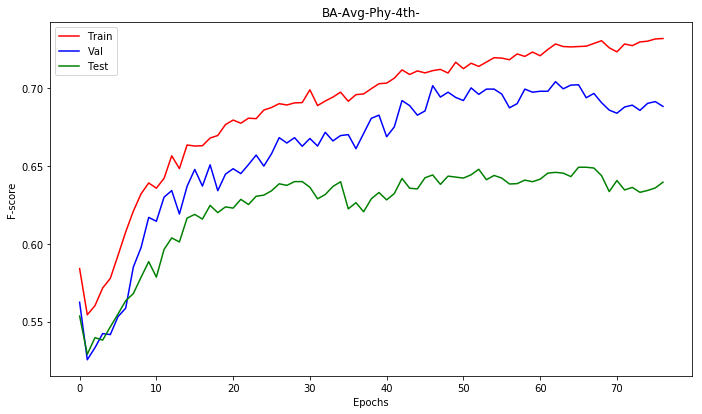

  1%|          | 6/839 [00:00<00:14, 57.59it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 56.17it/s]


==========Epoch No:77==========
Training Loss: 443.808876626
Train: (0.7315991517421792, 0.7377830750893921, 0.7280027412110659, None)
                    0            1
Precision    0.688312     0.756579
Recall       0.517915     0.864662
F-score      0.591078     0.807018
Count      921.000000  1596.000000
--------
Val: (0.7025954003802104, 0.7063492063492064, 0.6891706618462534, None)
                    0           1
Precision    0.685897    0.713080
Recall       0.440329    0.873385
F-score      0.536341    0.785134
Count      243.000000  387.000000
--------
Test: (0.647502304606722, 0.662007623888183, 0.640654060509976, None)
                    0           1
Precision    0.582888    0.686667
Recall       0.367003    0.840816
F-score      0.450413    0.755963
Count      297.000000  490.000000




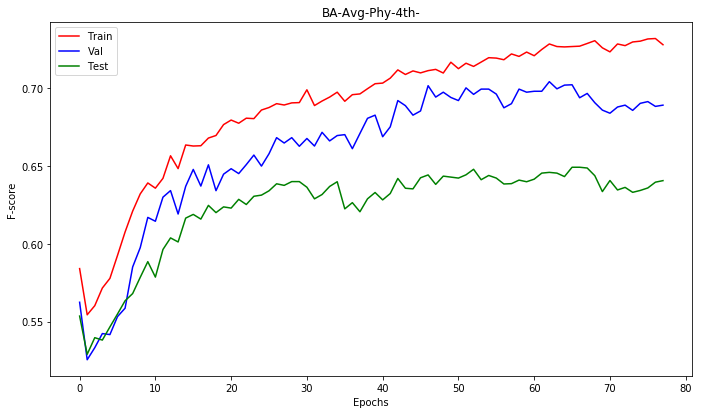

  1%|          | 6/839 [00:00<00:22, 36.84it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:15<00:00, 54.07it/s]


==========Epoch No:78==========
Training Loss: 443.378827333
Train: (0.734041323598439, 0.7401668653158522, 0.7320028542427022, None)
                    0            1
Precision    0.685160     0.762249
Recall       0.536374     0.857769
F-score      0.601705     0.807193
Count      921.000000  1596.000000
--------
Val: (0.7008735312306741, 0.7063492063492064, 0.692526692139805, None)
                    0           1
Precision    0.672619    0.718615
Recall       0.465021    0.857881
F-score      0.549878    0.782097
Count      243.000000  387.000000
--------
Test: (0.6451601941461644, 0.6594663278271918, 0.6418348983905562, None)
                    0           1
Precision    0.572139    0.689420
Recall       0.387205    0.824490
F-score      0.461847    0.750929
Count      297.000000  490.000000




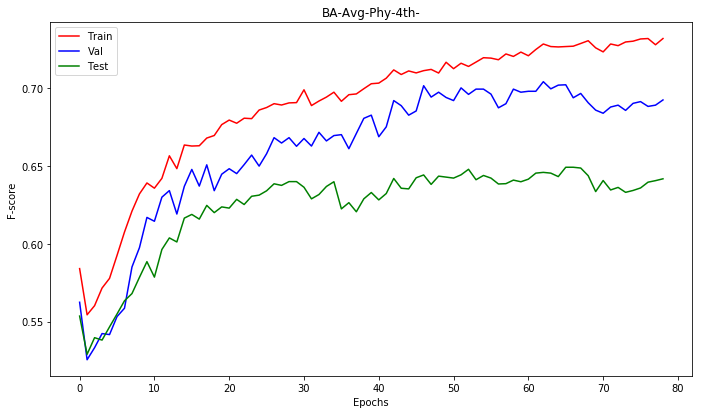

  1%|          | 8/839 [00:00<00:11, 71.89it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.49it/s]


==========Epoch No:79==========
Training Loss: 442.234255746
Train: (0.7337161413560053, 0.7397695669447756, 0.7304555062287336, None)
                    0            1
Precision    0.690000     0.758943
Recall       0.524430     0.864035
F-score      0.595928     0.808087
Count      921.000000  1596.000000
--------
Val: (0.7036167874028261, 0.707936507936508, 0.6922854234689155, None)
                    0           1
Precision    0.683230    0.716418
Recall       0.452675    0.868217
F-score      0.544554    0.785047
Count      243.000000  387.000000
--------
Test: (0.6416967625663336, 0.6569250317662008, 0.6369745467545178, None)
                    0           1
Precision    0.569948    0.685185
Recall       0.370370    0.830612
F-score      0.448980    0.750923
Count      297.000000  490.000000




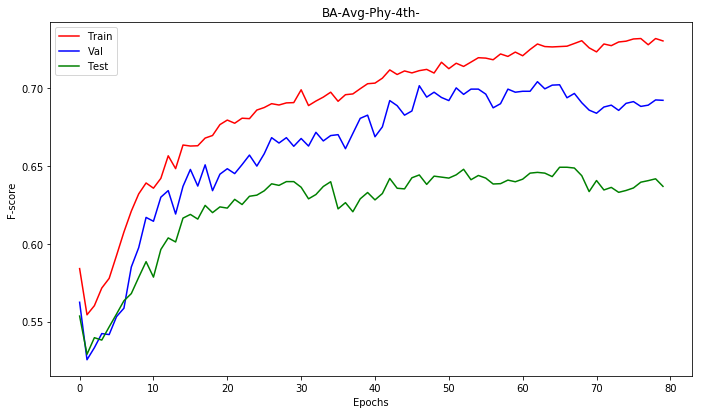

  1%|          | 7/839 [00:00<00:11, 69.48it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:15<00:00, 55.05it/s]


==========Epoch No:80==========
Training Loss: 442.573854364
Train: (0.7314839294254442, 0.7377830750893921, 0.7288963234100452, None)
                    0            1
Precision    0.684062     0.758850
Recall       0.526602     0.859649
F-score      0.595092     0.806110
Count      921.000000  1596.000000
--------
Val: (0.7056344984802432, 0.7095238095238096, 0.6936774822271867, None)
                    0           1
Precision    0.687500    0.717021
Recall       0.452675    0.870801
F-score      0.545906    0.786464
Count      243.000000  387.000000
--------
Test: (0.6447002897944693, 0.6594663278271918, 0.6396636241859658, None)
                    0           1
Precision    0.575130    0.686869
Recall       0.373737    0.832653
F-score      0.453061    0.752768
Count      297.000000  490.000000




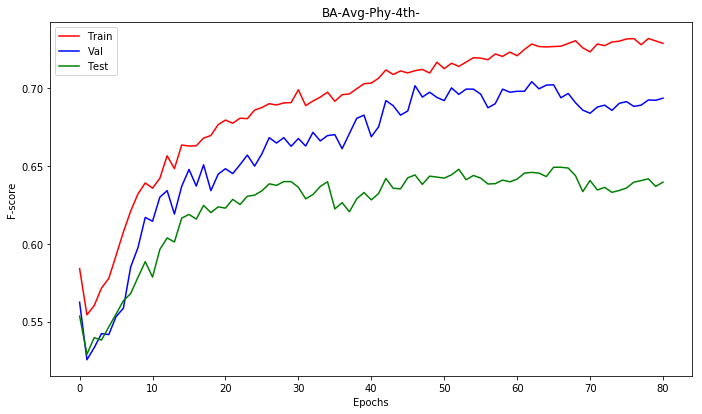

  1%|          | 7/839 [00:00<00:12, 69.13it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 59.10it/s]


==========Epoch No:81==========
Training Loss: 440.701293103
Train: (0.7353474826661226, 0.7413587604290822, 0.7329682171870586, None)
                    0            1
Precision    0.688547     0.762354
Recall       0.535288     0.860276
F-score      0.602321     0.808360
Count      921.000000  1596.000000
--------
Val: (0.6979242979242979, 0.7031746031746032, 0.6875522138680034, None)
                    0           1
Precision    0.672840    0.713675
Recall       0.448560    0.863049
F-score      0.538272    0.781287
Count      243.000000  387.000000
--------
Test: (0.6464535113247314, 0.6607369758576874, 0.6423746397966021, None)
                    0           1
Precision    0.575758    0.689304
Recall       0.383838    0.828571
F-score      0.460606    0.752549
Count      297.000000  490.000000




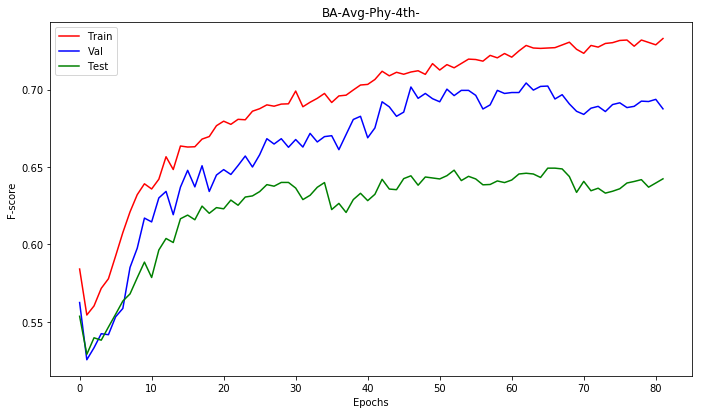

  1%|          | 7/839 [00:00<00:12, 64.61it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 56.16it/s]


==========Epoch No:82==========
Training Loss: 440.900122322
Train: (0.7357567458533188, 0.7417560588001589, 0.7341595122533154, None)
                    0            1
Precision    0.685363     0.764838
Recall       0.543974     0.855890
F-score      0.606538     0.807806
Count      921.000000  1596.000000
--------
Val: (0.70427840701498, 0.7095238095238096, 0.6963697539528487, None)
                    0           1
Precision    0.676471    0.721739
Recall       0.473251    0.857881
F-score      0.556901    0.783943
Count      243.000000  387.000000
--------
Test: (0.6466932882321562, 0.6607369758576874, 0.6434330911757026, None)
                    0           1
Precision    0.574257    0.690598
Recall       0.390572    0.824490
F-score      0.464930    0.751628
Count      297.000000  490.000000




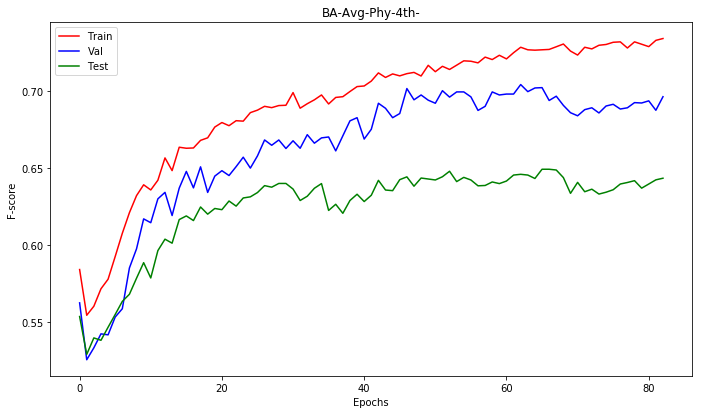

  1%|          | 6/839 [00:00<00:15, 54.59it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.48it/s]


==========Epoch No:83==========
Training Loss: 441.158530354
Train: (0.7355269567545514, 0.7413587604290822, 0.7317678785937178, None)
                    0            1
Precision    0.694524     0.759188
Recall       0.523344     0.867168
F-score      0.596904     0.809593
Count      921.000000  1596.000000
--------
Val: (0.6892712383158243, 0.6952380952380952, 0.6777142857142858, None)
                    0           1
Precision    0.662420    0.706131
Recall       0.427984    0.863049
F-score      0.520000    0.776744
Count      243.000000  387.000000
--------
Test: (0.6430487330430436, 0.6581956797966964, 0.6374692702817341, None)
                    0           1
Precision    0.573684    0.685092
Recall       0.367003    0.834694
F-score      0.447639    0.752530
Count      297.000000  490.000000




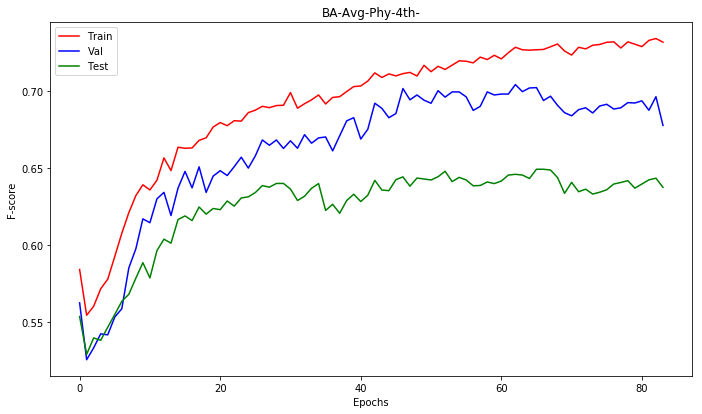

  1%|          | 7/839 [00:00<00:13, 62.46it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.28it/s]


==========Epoch No:84==========
Training Loss: 440.919829562
Train: (0.7387704298583581, 0.7445371473976957, 0.7365622167828393, None)
                    0            1
Precision    0.692521     0.765460
Recall       0.542888     0.860902
F-score      0.608643     0.810380
Count      921.000000  1596.000000
--------
Val: (0.6957296466973887, 0.7015873015873015, 0.6867222945516234, None)
                    0           1
Precision    0.666667    0.713978
Recall       0.452675    0.857881
F-score      0.539216    0.779343
Count      243.000000  387.000000
--------
Test: (0.6419424702434084, 0.6569250317662008, 0.6380839450791969, None)
                    0           1
Precision    0.568528    0.686441
Recall       0.377104    0.826531
F-score      0.453441    0.750000
Count      297.000000  490.000000




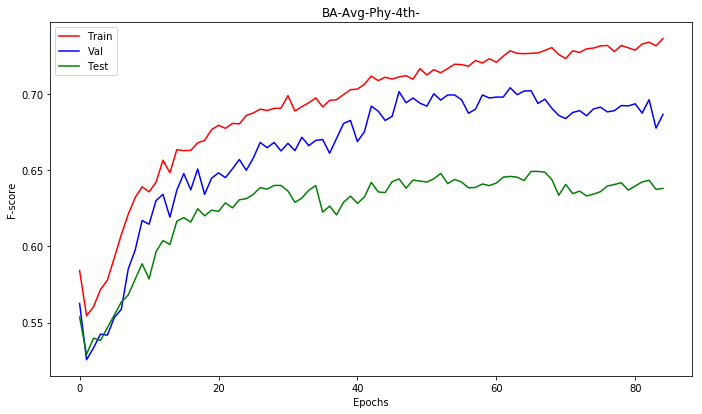

  1%|          | 7/839 [00:00<00:12, 68.55it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.74it/s]


==========Epoch No:85==========
Training Loss: 439.960244745
Train: (0.7383527177581193, 0.744139849026619, 0.7359965960145715, None)
                    0            1
Precision    0.692629     0.764739
Recall       0.540717     0.861529
F-score      0.607317     0.810253
Count      921.000000  1596.000000
--------
Val: (0.6972479901051329, 0.7031746031746032, 0.6892026563791542, None)
                    0           1
Precision    0.666667    0.716450
Recall       0.460905    0.855297
F-score      0.545012    0.779741
Count      243.000000  387.000000
--------
Test: (0.6420773924684839, 0.6569250317662008, 0.6386268617229391, None)
                    0           1
Precision    0.567839    0.687075
Recall       0.380471    0.824490
F-score      0.455645    0.749536
Count      297.000000  490.000000




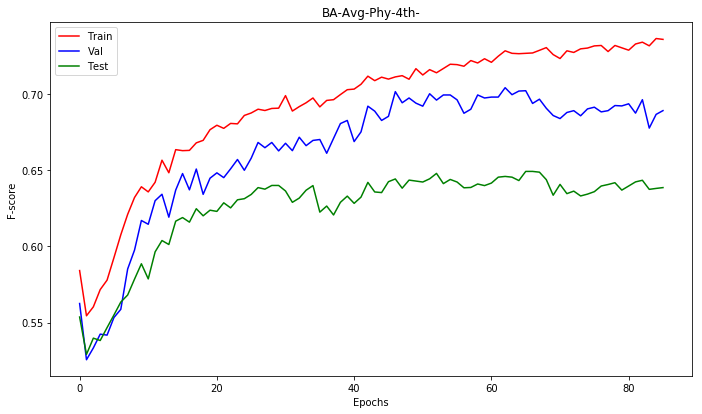

  1%|          | 6/839 [00:00<00:17, 46.54it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 57.07it/s]


==========Epoch No:86==========
Training Loss: 438.603686482
Train: (0.7421714980370703, 0.7477155343663091, 0.74034416740029, None)
                    0            1
Precision    0.695355     0.769188
Recall       0.552660     0.860276
F-score      0.615850     0.812186
Count      921.000000  1596.000000
--------
Val: (0.7006740957252465, 0.7063492063492064, 0.6930513906080712, None)
                    0           1
Precision    0.670588    0.719565
Recall       0.469136    0.855297
F-score      0.552058    0.781582
Count      243.000000  387.000000
--------
Test: (0.648487700241366, 0.662007623888183, 0.6460443658041303, None)
                    0           1
Precision    0.574879    0.693103
Recall       0.400673    0.820408
F-score      0.472222    0.751402
Count      297.000000  490.000000




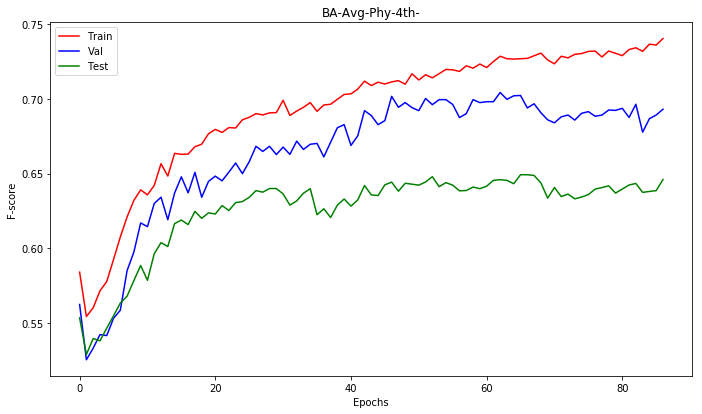

  1%|          | 6/839 [00:00<00:14, 57.45it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:14<00:00, 58.34it/s]


==========Epoch No:87==========
Training Loss: 436.77086848
Train: (0.7404599753703719, 0.7461263408820024, 0.7389080520947461, None)
                    0            1
Precision    0.691576     0.768669
Recall       0.552660     0.857769
F-score      0.614363     0.810779
Count      921.000000  1596.000000
--------
Val: (0.7023801333398857, 0.707936507936508, 0.694967916244512, None)
                    0           1
Precision    0.672515    0.721133
Recall       0.473251    0.855297
F-score      0.555556    0.782506
Count      243.000000  387.000000
--------
Test: (0.6394455613620791, 0.6543837357052097, 0.637020540960061, None)
                    0           1
Precision    0.561576    0.686644
Recall       0.383838    0.818367
F-score      0.456000    0.746741
Count      297.000000  490.000000




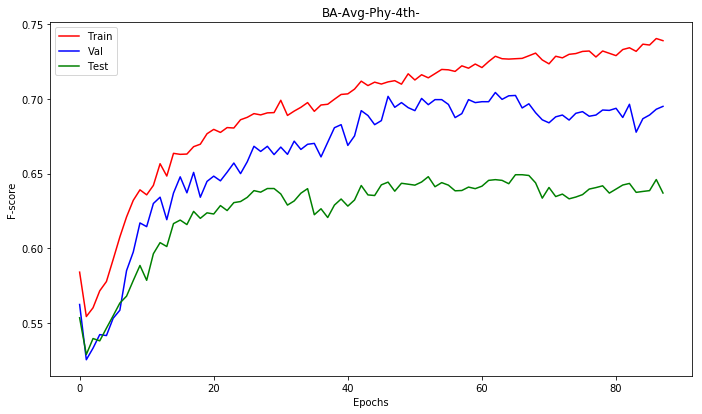

  1%|          | 7/839 [00:00<00:12, 68.12it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:13<00:00, 60.41it/s]


==========Epoch No:88==========
Training Loss: 437.314633608
Train: (0.733635988465895, 0.7397695669447756, 0.7311126386774778, None)
                    0            1
Precision    0.686798     0.760665
Recall       0.530945     0.860276
F-score      0.598898     0.807410
Count      921.000000  1596.000000
--------
Val: (0.7033189639802794, 0.707936507936508, 0.6928415685098234, None)
                    0           1
Precision    0.680982    0.717345
Recall       0.456790    0.865633
F-score      0.546798    0.784543
Count      243.000000  387.000000
--------
Test: (0.6436216066446017, 0.6581956797966964, 0.6402328320933567, None)
                    0           1
Precision    0.570000    0.688245
Recall       0.383838    0.824490
F-score      0.458753    0.750232
Count      297.000000  490.000000




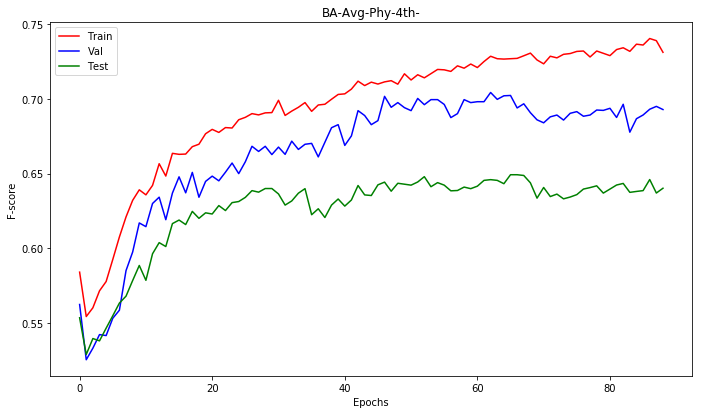

  1%|          | 9/839 [00:00<00:10, 81.62it/s]

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


100%|██████████| 839/839 [00:15<00:00, 55.12it/s]


==========Epoch No:89==========
Training Loss: 436.782148167
Train: (0.7387851642307287, 0.7445371473976957, 0.7377668769805122, None)
                    0            1
Precision    0.686327     0.769057
Recall       0.555917     0.853383
F-score      0.614277     0.809029
Count      921.000000  1596.000000
--------
Val: (0.7068486616717267, 0.7126984126984127, 0.7030242541981664, None)
                    0           1
Precision    0.668478    0.730942
Recall       0.506173    0.842377
F-score      0.576112    0.782713
Count      243.000000  387.000000
--------
Test: (0.6459174535450679, 0.6594663278271918, 0.644377976107402, None)
                    0           1
Precision    0.568720    0.692708
Recall       0.404040    0.814286
F-score      0.472441    0.748593
Count      297.000000  490.000000




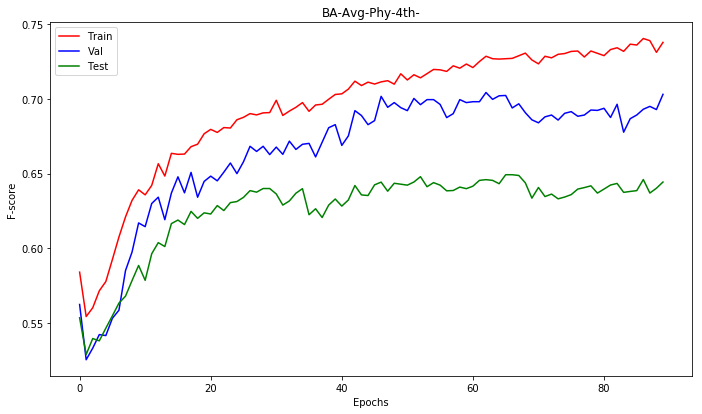

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


In [8]:
start_epoch = 0
end_epoch = 90
model_name = params['model_name']
for iter_ in range(start_epoch, end_epoch):
    total_loss = 0
    for ind in tqdm(range(0,len(data['train_ids']),params['batch_size'])):
        model_RNN.zero_grad()
        curr_set_ids = data['train_ids'][ind:ind+params['batch_size']]
        curr_feats, curr_labels, curr_lens = batchify.prepare_batch(data['data'],
                                                                    curr_set_ids,
                                                                   params['num_of_features'],
                                                                       feature_ind, 
                                                                           label_ind)
#         print curr_set_ids
#         print curr_lens
        tag_scores = model_RNN(curr_feats, curr_lens)

        loss = loss_function(tag_scores, curr_labels.reshape(tag_scores.shape[0]))
        total_loss+=loss.item()

        loss.backward()
        optimizer.step()
    prf_tr, df_tr = eval_plot.evaluate_(model_RNN, data, 'train_ids', 
                                        params['batch_size'],params['num_of_features'],
                                       feature_ind, label_ind)
    prf_test, df_test = eval_plot.evaluate_(model_RNN, data, 'test_ids', 
                                            params['batch_size'],params['num_of_features'],
                                           feature_ind, label_ind)
    prf_val, df_val = eval_plot.evaluate_(model_RNN, data, 'val_ids', 
                                          params['batch_size'],params['num_of_features'],
                                         feature_ind, label_ind)
    
    df_all = pd.concat([df_tr, df_val, df_test],axis=1)
    dict_df_prf_mod['Epoch'+str(iter_)] = df_all
    
    print '=='*5 + "Epoch No:"+str(iter_) +"=="*5
    print "Training Loss: "+str(total_loss)
    print "=="*4
    print "Train: " + str(prf_tr)
    print df_tr
    print "--"*4
    print "Val: " + str(prf_val)
    print df_val
    print "--"*4
    print "Test: " + str(prf_test)
    print df_test
    print '=='*40
    print '\n'
    if(save_flag):
        torch.save(model_RNN, '../../Models/'+model_name+str(iter_)+'.pt')
        pickle.dump(dict_df_prf_mod, open('../../Results/dict_prf_'+model_name+str(iter_)+'.pkl','wb'))
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_+1, 
                              model_name)

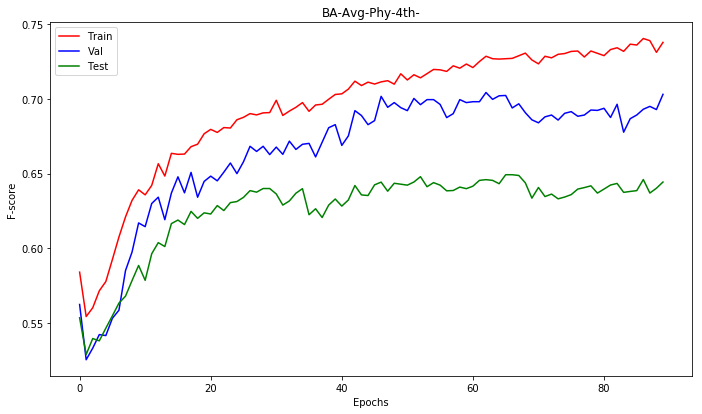

==========Epoch62========
TRAIN: (0.7330900410367781, 0.7389749702026222, 0.7284909093052858)
VAL: (0.7230833333333334, 0.7222222222222222, 0.7042535020294602)
TEST: (0.6551577681876861, 0.6683608640406608, 0.6459651610527392)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694118     0.755580    0.726667    0.720833    0.598901   
Recall       0.512486     0.869674    0.448560    0.894057    0.367003   
F-score      0.589631     0.808622    0.554707    0.798155    0.455115   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.689256  
Recall       0.851020  
F-score      0.761644  
Count      490.000000  


In [9]:
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_+1, 
                              model_name)